In [115]:
!pip install scikit-learn xgboost lightgbm catboost

     ---------------------------------------- 1.0/1.0 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 101.0/101.0 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [117]:
import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [8]:
df = pd.read_excel('./Confocal Raman Data/Subjects Components Filtered.xlsx')

In [9]:
df

,Healthy/Eczema,Subject,Ceramide 2,Ceramide 3,Lactic Acid,PCA,Uric Acid,Urea,Melanin,Cholesterol,Watermass
0,Eczema,EC001,0.000000,0.120289,0.026488,0.060566,0.000749,0.021031,2.230477,0.000000,43709.818546
1,Eczema,EC002,0.000000,0.110608,0.086276,0.040751,0.000102,0.013240,0.037265,0.001449,50761.610963
2,Eczema,EC003,0.000000,0.146709,0.051836,0.073384,0.000108,0.008633,2.728881,0.001867,39431.720135
3,Eczema,EC004,0.000000,0.306053,0.229205,0.264416,0.006567,0.024359,12.517264,0.000000,24836.572041
4,Eczema,EC006,0.000000,0.270734,0.129418,0.070845,0.000929,0.005694,0.733396,0.003287,76318.466566
...,...,...,...,...,...,...,...,...,...,...,...
71,Healthy,H046,0.000000,0.331470,0.144327,0.103408,0.002034,0.054572,1.730375,0.006811,13379.936053
72,Healthy,H047,0.000000,0.347538,0.123235,0.147987,0.001989,0.024887,1.021039,0.010425,7524.435836
73,Healthy,H048,0.026054,0.236214,0.042040,0.046963,0.004684,0.009837,0.000000,0.007840,12533.452496
74,Healthy,H049,0.000000,0.246170,0.079999,0.113140,0.002050,0.040404,2.954459,0.002814,10455.569270


In [11]:
df['class'] = 1

In [14]:
df.loc[df['Healthy/Eczema'] == 'Healthy', 'class'] = 0

In [17]:
df = df.drop('Healthy/Eczema', axis=1)
df = df.drop('Subject', axis=1)

In [106]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [93]:
models = [SVC(), KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(n_estimators=20), DecisionTreeClassifier()]

In [105]:
model = 0
for model in models:
    scores = cross_val_score(model, df.iloc[:, :-1], df.iloc[:, -1], cv=5)
    average_score = scores.mean()
    print("Average cross-validation score:", average_score)
    model.fit(df.iloc[:, :-1], df.iloc[:, -1])
    y_pred = model.predict(df.iloc[:, :-1])
    accuracy = accuracy_score(df.iloc[:, -1], y_pred)
    print(model , accuracy)

Average cross-validation score: 0.49916666666666665
SVC() 0.6578947368421053
Average cross-validation score: 0.695
KNeighborsClassifier(n_neighbors=3) 0.8289473684210527
Average cross-validation score: 0.6583333333333333
RandomForestClassifier(n_estimators=20) 1.0
Average cross-validation score: 0.6591666666666667
DecisionTreeClassifier() 1.0


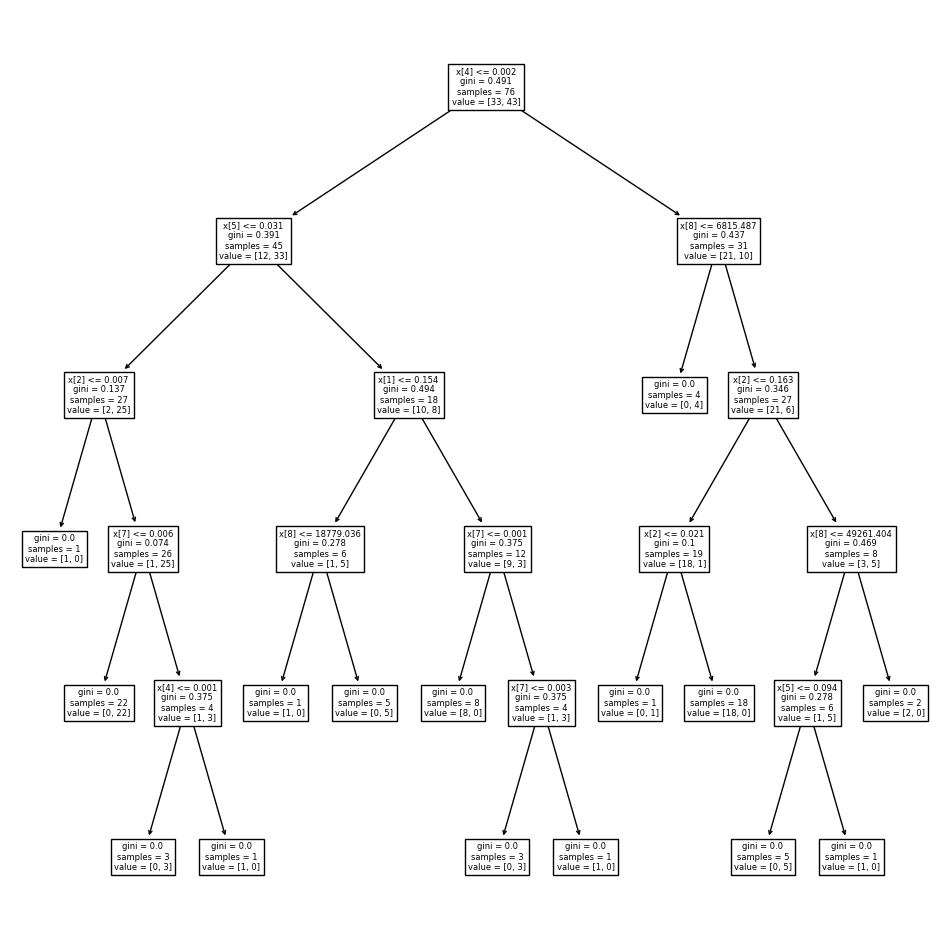

In [63]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model)
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [101]:
model1 = 0 
for model1 in models:
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model1 , accuracy)

SVC() 0.625
KNeighborsClassifier(n_neighbors=3) 0.75
RandomForestClassifier(n_estimators=20) 0.8125
DecisionTreeClassifier() 0.625


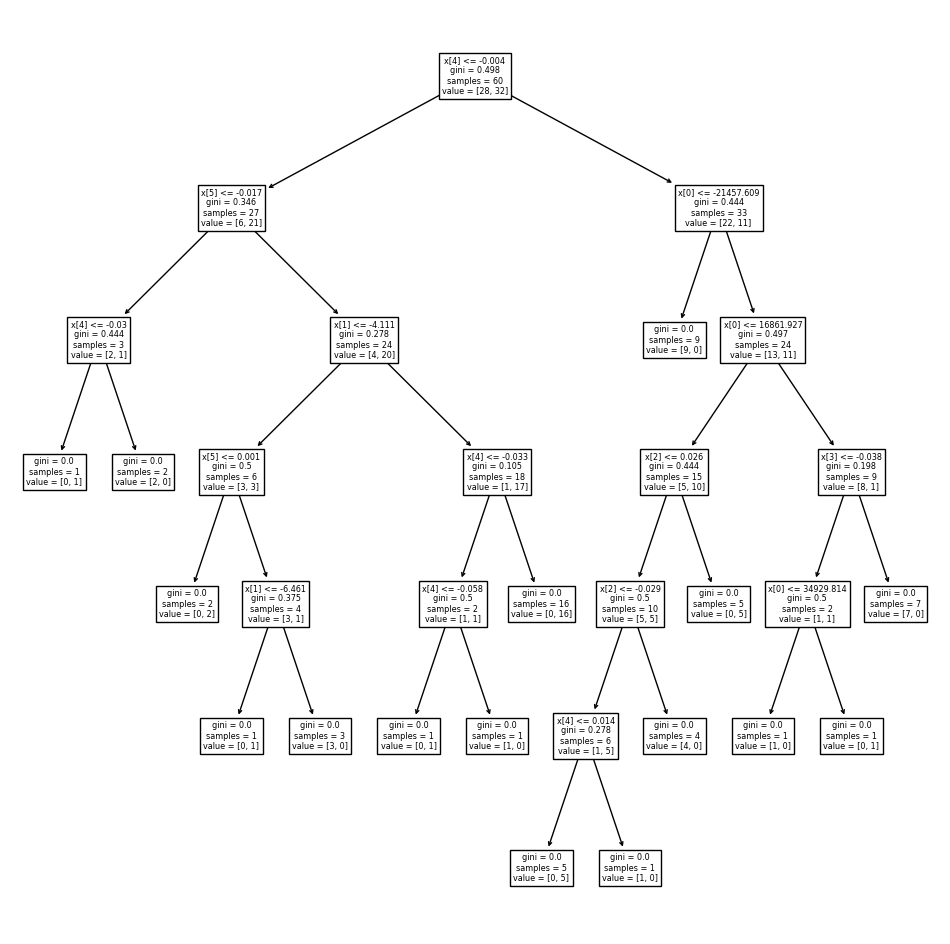

In [97]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model1)
plt.show()

In [102]:
for i in range(1, 7):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df.iloc[:, :-1])
    X_train, X_test, y_train, y_test = train_test_split(X_pca, df.iloc[:, -1], test_size=0.2, random_state=42)
    model2 = 0 
    for model2 in models:
        model2.fit(X_train, y_train)
        y_pred = model2.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(i ,model2 , accuracy)

1 SVC() 0.625
1 KNeighborsClassifier(n_neighbors=3) 0.75
1 RandomForestClassifier(n_estimators=20) 0.75
1 DecisionTreeClassifier() 0.75
2 SVC() 0.625
2 KNeighborsClassifier(n_neighbors=3) 0.75
2 RandomForestClassifier(n_estimators=20) 0.6875
2 DecisionTreeClassifier() 0.75
3 SVC() 0.625
3 KNeighborsClassifier(n_neighbors=3) 0.75
3 RandomForestClassifier(n_estimators=20) 0.75
3 DecisionTreeClassifier() 0.625
4 SVC() 0.625
4 KNeighborsClassifier(n_neighbors=3) 0.75
4 RandomForestClassifier(n_estimators=20) 0.75
4 DecisionTreeClassifier() 0.625
5 SVC() 0.625
5 KNeighborsClassifier(n_neighbors=3) 0.75
5 RandomForestClassifier(n_estimators=20) 0.5625
5 DecisionTreeClassifier() 0.8125
6 SVC() 0.625
6 KNeighborsClassifier(n_neighbors=3) 0.75
6 RandomForestClassifier(n_estimators=20) 0.8125
6 DecisionTreeClassifier() 0.625


In [107]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5)
average_score = scores.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.6958333333333334


In [108]:
rf.fit(X, y)
feature_importances = rf.feature_importances_
selector = SelectFromModel(rf, threshold=0.05)  
selector.fit(X, y)
X_selected = selector.transform(X)

In [109]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2)
rf.fit(X_selected , y)

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

In [110]:

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 200}


In [111]:
best_score = grid_search.best_score_
print("Best cross-validation accuracy:", best_score)

Best cross-validation accuracy: 0.7216666666666667


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [124]:
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'Support Vector Machine': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'XGBoost': (xgb.XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'LightGBM': (lgb.LGBMClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'CatBoost': (CatBoostClassifier(), {
        'iterations': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'depth': [3, 5, 7],
    })
}

for clf_name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X, y)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(f"Results for {clf_name}:")
    print("Best cross-validation accuracy:", best_score)
    print("Best hyperparameters:", best_params)
    print("-----------------------------------")
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Test accuracy:", test_score)
    print("-----------------------------------")

Results for Random Forest:
Best cross-validation accuracy: 0.7350000000000001
Best hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
Results for Support Vector Machine:
Best cross-validation accuracy: 0.5666666666666667
Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
-----------------------------------
Test accuracy: 0.6086956521739131
-----------------------------------
Results for Logistic Regression:
Best cross-validation accuracy: 0.5791666666666667
Best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
-----------------------------------
Test accuracy: 0.5652173913043478
-----------------------------------


C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Results for K-Nearest Neighbors:
Best cross-validation accuracy: 0.7366666666666667
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
Results for Decision Tree:
Best cross-validation accuracy: 0.6975
Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2}
-----------------------------------
Test accuracy: 0.8695652173913043
-----------------------------------
Results for AdaBoost:
Best cross-validation accuracy: 0.6958333333333334
Best hyperparameters: {'learning_rate': 0.001, 'n_estimators': 50}
-----------------------------------
Test accuracy: 0.7391304347826086
-----------------------------------
Results for XGBoost:
Best cross-validation accuracy: 0.735
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
-----------------------------------
Test accuracy: 

7:	learn: 0.6089748	total: 3.93ms	remaining: 20.7ms
8:	learn: 0.6054168	total: 4.62ms	remaining: 21ms
9:	learn: 0.6043718	total: 5.05ms	remaining: 20.2ms
10:	learn: 0.5973184	total: 5.48ms	remaining: 19.4ms
11:	learn: 0.5903009	total: 5.89ms	remaining: 18.7ms
12:	learn: 0.5876369	total: 6.32ms	remaining: 18ms
13:	learn: 0.5800722	total: 6.74ms	remaining: 17.3ms
14:	learn: 0.5663150	total: 7.29ms	remaining: 17ms
15:	learn: 0.5633285	total: 7.73ms	remaining: 16.4ms
16:	learn: 0.5538113	total: 8.18ms	remaining: 15.9ms
17:	learn: 0.5494444	total: 8.61ms	remaining: 15.3ms
18:	learn: 0.5413704	total: 9.05ms	remaining: 14.8ms
19:	learn: 0.5363765	total: 9.46ms	remaining: 14.2ms
20:	learn: 0.5342945	total: 9.88ms	remaining: 13.6ms
21:	learn: 0.5299433	total: 10.3ms	remaining: 13.2ms
22:	learn: 0.5231723	total: 10.8ms	remaining: 12.6ms
23:	learn: 0.5205009	total: 11.2ms	remaining: 12.1ms
24:	learn: 0.5184307	total: 11.6ms	remaining: 11.6ms
25:	learn: 0.5131156	total: 12.1ms	remaining: 11.1ms
26

0:	learn: 0.6922635	total: 469us	remaining: 23ms
1:	learn: 0.6906637	total: 1.05ms	remaining: 25.2ms
2:	learn: 0.6898623	total: 1.43ms	remaining: 22.4ms
3:	learn: 0.6891616	total: 1.81ms	remaining: 20.8ms
4:	learn: 0.6883550	total: 2.17ms	remaining: 19.6ms
5:	learn: 0.6877712	total: 2.56ms	remaining: 18.7ms
6:	learn: 0.6871472	total: 2.95ms	remaining: 18.1ms
7:	learn: 0.6863906	total: 3.32ms	remaining: 17.4ms
8:	learn: 0.6850916	total: 3.71ms	remaining: 16.9ms
9:	learn: 0.6841977	total: 4.08ms	remaining: 16.3ms
10:	learn: 0.6832967	total: 4.44ms	remaining: 15.7ms
11:	learn: 0.6825602	total: 4.8ms	remaining: 15.2ms
12:	learn: 0.6819392	total: 5.18ms	remaining: 14.7ms
13:	learn: 0.6805023	total: 5.53ms	remaining: 14.2ms
14:	learn: 0.6799839	total: 5.94ms	remaining: 13.9ms
15:	learn: 0.6794682	total: 6.31ms	remaining: 13.4ms
16:	learn: 0.6787409	total: 6.69ms	remaining: 13ms
17:	learn: 0.6776839	total: 7.08ms	remaining: 12.6ms
18:	learn: 0.6769686	total: 7.51ms	remaining: 12.3ms
19:	learn

42:	learn: 0.6888767	total: 17.3ms	remaining: 2.81ms
43:	learn: 0.6887267	total: 18ms	remaining: 2.46ms
44:	learn: 0.6886631	total: 18.4ms	remaining: 2.05ms
45:	learn: 0.6885688	total: 18.8ms	remaining: 1.64ms
46:	learn: 0.6884736	total: 19.3ms	remaining: 1.23ms
47:	learn: 0.6883326	total: 19.7ms	remaining: 821us
48:	learn: 0.6882411	total: 20.2ms	remaining: 411us
49:	learn: 0.6881662	total: 20.6ms	remaining: 0us
0:	learn: 0.6930583	total: 509us	remaining: 25ms
1:	learn: 0.6928985	total: 918us	remaining: 22ms
2:	learn: 0.6928170	total: 1.33ms	remaining: 20.8ms
3:	learn: 0.6927449	total: 1.71ms	remaining: 19.7ms
4:	learn: 0.6926632	total: 2.08ms	remaining: 18.7ms
5:	learn: 0.6926044	total: 2.47ms	remaining: 18.1ms
6:	learn: 0.6925404	total: 2.85ms	remaining: 17.5ms
7:	learn: 0.6924635	total: 3.23ms	remaining: 17ms
8:	learn: 0.6923306	total: 3.62ms	remaining: 16.5ms
9:	learn: 0.6922388	total: 3.98ms	remaining: 15.9ms
10:	learn: 0.6921456	total: 4.37ms	remaining: 15.5ms
11:	learn: 0.69206

54:	learn: 0.4121521	total: 21.5ms	remaining: 17.6ms
55:	learn: 0.4043082	total: 22.2ms	remaining: 17.4ms
56:	learn: 0.4024110	total: 22.6ms	remaining: 17ms
57:	learn: 0.3986076	total: 23.1ms	remaining: 16.7ms
58:	learn: 0.3947011	total: 23.5ms	remaining: 16.3ms
59:	learn: 0.3902132	total: 23.9ms	remaining: 16ms
60:	learn: 0.3840138	total: 24.4ms	remaining: 15.6ms
61:	learn: 0.3790983	total: 24.8ms	remaining: 15.2ms
62:	learn: 0.3755769	total: 25.2ms	remaining: 14.8ms
63:	learn: 0.3721920	total: 25.6ms	remaining: 14.4ms
64:	learn: 0.3673377	total: 26ms	remaining: 14ms
65:	learn: 0.3655858	total: 26.4ms	remaining: 13.6ms
66:	learn: 0.3606672	total: 26.7ms	remaining: 13.2ms
67:	learn: 0.3548555	total: 27.1ms	remaining: 12.8ms
68:	learn: 0.3510290	total: 27.6ms	remaining: 12.4ms
69:	learn: 0.3482036	total: 28ms	remaining: 12ms
70:	learn: 0.3430061	total: 28.4ms	remaining: 11.6ms
71:	learn: 0.3403058	total: 28.8ms	remaining: 11.2ms
72:	learn: 0.3371498	total: 29.1ms	remaining: 10.8ms
73:	l

28:	learn: 0.5014302	total: 12.1ms	remaining: 29.5ms
29:	learn: 0.5004315	total: 12.9ms	remaining: 30.2ms
30:	learn: 0.4941552	total: 13.6ms	remaining: 30.2ms
31:	learn: 0.4915264	total: 14.2ms	remaining: 30.1ms
32:	learn: 0.4867449	total: 14.6ms	remaining: 29.7ms
33:	learn: 0.4832346	total: 15.1ms	remaining: 29.3ms
34:	learn: 0.4772131	total: 15.5ms	remaining: 28.8ms
35:	learn: 0.4718509	total: 15.9ms	remaining: 28.3ms
36:	learn: 0.4653865	total: 16.3ms	remaining: 27.8ms
37:	learn: 0.4620998	total: 16.7ms	remaining: 27.2ms
38:	learn: 0.4578164	total: 17.1ms	remaining: 26.8ms
39:	learn: 0.4544485	total: 17.5ms	remaining: 26.3ms
40:	learn: 0.4517253	total: 17.9ms	remaining: 25.8ms
41:	learn: 0.4478130	total: 18.4ms	remaining: 25.4ms
42:	learn: 0.4438865	total: 18.9ms	remaining: 25.1ms
43:	learn: 0.4383602	total: 19.4ms	remaining: 24.7ms
44:	learn: 0.4353187	total: 19.8ms	remaining: 24.2ms
45:	learn: 0.4330335	total: 20.1ms	remaining: 23.7ms
46:	learn: 0.4272567	total: 20.6ms	remaining: 

0:	learn: 0.6923440	total: 476us	remaining: 47.2ms
1:	learn: 0.6907327	total: 1.13ms	remaining: 55.5ms
2:	learn: 0.6894571	total: 1.56ms	remaining: 50.5ms
3:	learn: 0.6884650	total: 1.99ms	remaining: 47.9ms
4:	learn: 0.6871974	total: 2.44ms	remaining: 46.4ms
5:	learn: 0.6864077	total: 2.86ms	remaining: 44.9ms
6:	learn: 0.6853761	total: 3.28ms	remaining: 43.6ms
7:	learn: 0.6850533	total: 3.64ms	remaining: 41.9ms
8:	learn: 0.6841656	total: 4.03ms	remaining: 40.7ms
9:	learn: 0.6833249	total: 4.45ms	remaining: 40.1ms
10:	learn: 0.6820110	total: 4.84ms	remaining: 39.2ms
11:	learn: 0.6813912	total: 5.31ms	remaining: 39ms
12:	learn: 0.6808620	total: 5.7ms	remaining: 38.2ms
13:	learn: 0.6799449	total: 6.18ms	remaining: 38ms
14:	learn: 0.6786380	total: 6.61ms	remaining: 37.5ms
15:	learn: 0.6779745	total: 7.05ms	remaining: 37ms
16:	learn: 0.6765414	total: 7.47ms	remaining: 36.5ms
17:	learn: 0.6760030	total: 7.91ms	remaining: 36.1ms
18:	learn: 0.6749412	total: 8.35ms	remaining: 35.6ms
19:	learn: 

0:	learn: 0.6927466	total: 458us	remaining: 45.4ms
1:	learn: 0.6910857	total: 1.03ms	remaining: 50.7ms
2:	learn: 0.6895157	total: 1.49ms	remaining: 48.2ms
3:	learn: 0.6888738	total: 1.89ms	remaining: 45.3ms
4:	learn: 0.6886204	total: 2.27ms	remaining: 43.2ms
5:	learn: 0.6879698	total: 2.65ms	remaining: 41.5ms
6:	learn: 0.6869180	total: 3.01ms	remaining: 40ms
7:	learn: 0.6861078	total: 3.38ms	remaining: 38.9ms
8:	learn: 0.6852421	total: 3.77ms	remaining: 38.1ms
9:	learn: 0.6842294	total: 4.15ms	remaining: 37.4ms
10:	learn: 0.6825454	total: 4.51ms	remaining: 36.5ms
11:	learn: 0.6816738	total: 4.88ms	remaining: 35.8ms
12:	learn: 0.6812227	total: 5.26ms	remaining: 35.2ms
13:	learn: 0.6806922	total: 5.63ms	remaining: 34.6ms
14:	learn: 0.6789259	total: 6.09ms	remaining: 34.5ms
15:	learn: 0.6775657	total: 6.47ms	remaining: 34ms
16:	learn: 0.6766242	total: 6.88ms	remaining: 33.6ms
17:	learn: 0.6755457	total: 7.24ms	remaining: 33ms
18:	learn: 0.6742872	total: 7.62ms	remaining: 32.5ms
19:	learn:

0:	learn: 0.6930583	total: 491us	remaining: 48.7ms
1:	learn: 0.6928985	total: 1.13ms	remaining: 55.2ms
2:	learn: 0.6928170	total: 1.53ms	remaining: 49.4ms
3:	learn: 0.6927449	total: 1.94ms	remaining: 46.6ms
4:	learn: 0.6926632	total: 2.35ms	remaining: 44.6ms
5:	learn: 0.6926044	total: 2.78ms	remaining: 43.6ms
6:	learn: 0.6925404	total: 3.17ms	remaining: 42.2ms
7:	learn: 0.6924635	total: 3.58ms	remaining: 41.2ms
8:	learn: 0.6923306	total: 3.99ms	remaining: 40.3ms
9:	learn: 0.6922388	total: 4.38ms	remaining: 39.4ms
10:	learn: 0.6921456	total: 4.79ms	remaining: 38.8ms
11:	learn: 0.6920695	total: 5.23ms	remaining: 38.3ms
12:	learn: 0.6920048	total: 5.66ms	remaining: 37.9ms
13:	learn: 0.6918555	total: 6.05ms	remaining: 37.1ms
14:	learn: 0.6918018	total: 6.46ms	remaining: 36.6ms
15:	learn: 0.6917466	total: 6.9ms	remaining: 36.2ms
16:	learn: 0.6916699	total: 7.32ms	remaining: 35.7ms
17:	learn: 0.6915598	total: 7.72ms	remaining: 35.2ms
18:	learn: 0.6914836	total: 8.12ms	remaining: 34.6ms
19:	l

0:	learn: 0.6756842	total: 1.63ms	remaining: 324ms
1:	learn: 0.6513137	total: 3.33ms	remaining: 329ms
2:	learn: 0.6326831	total: 4.79ms	remaining: 314ms
3:	learn: 0.6248151	total: 6.26ms	remaining: 307ms
4:	learn: 0.6005014	total: 7.69ms	remaining: 300ms
5:	learn: 0.5801111	total: 9.16ms	remaining: 296ms
6:	learn: 0.5666913	total: 10.6ms	remaining: 293ms
7:	learn: 0.5469159	total: 12.1ms	remaining: 289ms
8:	learn: 0.5379924	total: 13.5ms	remaining: 286ms
9:	learn: 0.5252460	total: 15.3ms	remaining: 291ms
10:	learn: 0.5104654	total: 16.8ms	remaining: 289ms
11:	learn: 0.5059465	total: 18.3ms	remaining: 286ms
12:	learn: 0.4924346	total: 19.7ms	remaining: 284ms
13:	learn: 0.4681195	total: 21.2ms	remaining: 281ms
14:	learn: 0.4569543	total: 22.6ms	remaining: 278ms
15:	learn: 0.4475714	total: 24ms	remaining: 276ms
16:	learn: 0.4395441	total: 25.4ms	remaining: 274ms
17:	learn: 0.4282095	total: 26.9ms	remaining: 272ms
18:	learn: 0.4246165	total: 28.3ms	remaining: 270ms
19:	learn: 0.4178837	tot

39:	learn: 0.2471873	total: 63.1ms	remaining: 252ms
40:	learn: 0.2441247	total: 65.1ms	remaining: 253ms
41:	learn: 0.2386407	total: 66.9ms	remaining: 252ms
42:	learn: 0.2349554	total: 68.6ms	remaining: 250ms
43:	learn: 0.2334261	total: 70.3ms	remaining: 249ms
44:	learn: 0.2321711	total: 71.9ms	remaining: 248ms
45:	learn: 0.2263274	total: 73.6ms	remaining: 246ms
46:	learn: 0.2210950	total: 75.2ms	remaining: 245ms
47:	learn: 0.2192670	total: 76.9ms	remaining: 244ms
48:	learn: 0.2151947	total: 78.6ms	remaining: 242ms
49:	learn: 0.2114659	total: 80.3ms	remaining: 241ms
50:	learn: 0.2048236	total: 82ms	remaining: 240ms
51:	learn: 0.2015569	total: 83.7ms	remaining: 238ms
52:	learn: 0.1980855	total: 85.3ms	remaining: 237ms
53:	learn: 0.1902118	total: 87ms	remaining: 235ms
54:	learn: 0.1887119	total: 88.7ms	remaining: 234ms
55:	learn: 0.1870149	total: 90.4ms	remaining: 232ms
56:	learn: 0.1845716	total: 92.2ms	remaining: 231ms
57:	learn: 0.1793685	total: 93.9ms	remaining: 230ms
58:	learn: 0.176

61:	learn: 0.1277216	total: 95.3ms	remaining: 212ms
62:	learn: 0.1260940	total: 97.1ms	remaining: 211ms
63:	learn: 0.1241842	total: 98.9ms	remaining: 210ms
64:	learn: 0.1197898	total: 100ms	remaining: 209ms
65:	learn: 0.1174090	total: 102ms	remaining: 207ms
66:	learn: 0.1144542	total: 104ms	remaining: 206ms
67:	learn: 0.1122683	total: 105ms	remaining: 204ms
68:	learn: 0.1095815	total: 107ms	remaining: 202ms
69:	learn: 0.1073267	total: 108ms	remaining: 201ms
70:	learn: 0.1057979	total: 110ms	remaining: 200ms
71:	learn: 0.1017369	total: 111ms	remaining: 198ms
72:	learn: 0.0987873	total: 113ms	remaining: 197ms
73:	learn: 0.0959772	total: 115ms	remaining: 195ms
74:	learn: 0.0941338	total: 116ms	remaining: 194ms
75:	learn: 0.0926516	total: 118ms	remaining: 192ms
76:	learn: 0.0906407	total: 119ms	remaining: 191ms
77:	learn: 0.0890206	total: 121ms	remaining: 189ms
78:	learn: 0.0869411	total: 122ms	remaining: 187ms
79:	learn: 0.0854643	total: 124ms	remaining: 186ms
80:	learn: 0.0841628	total: 

87:	learn: 0.0856319	total: 134ms	remaining: 171ms
88:	learn: 0.0846764	total: 136ms	remaining: 170ms
89:	learn: 0.0827728	total: 138ms	remaining: 168ms
90:	learn: 0.0819843	total: 139ms	remaining: 167ms
91:	learn: 0.0799639	total: 141ms	remaining: 165ms
92:	learn: 0.0785036	total: 142ms	remaining: 164ms
93:	learn: 0.0780277	total: 144ms	remaining: 162ms
94:	learn: 0.0769247	total: 145ms	remaining: 160ms
95:	learn: 0.0761399	total: 147ms	remaining: 159ms
96:	learn: 0.0733163	total: 148ms	remaining: 157ms
97:	learn: 0.0730632	total: 150ms	remaining: 156ms
98:	learn: 0.0727271	total: 151ms	remaining: 154ms
99:	learn: 0.0724103	total: 153ms	remaining: 153ms
100:	learn: 0.0715366	total: 154ms	remaining: 151ms
101:	learn: 0.0700317	total: 156ms	remaining: 150ms
102:	learn: 0.0687671	total: 157ms	remaining: 148ms
103:	learn: 0.0683942	total: 159ms	remaining: 147ms
104:	learn: 0.0673006	total: 160ms	remaining: 145ms
105:	learn: 0.0658022	total: 162ms	remaining: 144ms
106:	learn: 0.0654671	tot

129:	learn: 0.0519828	total: 198ms	remaining: 107ms
130:	learn: 0.0515538	total: 200ms	remaining: 105ms
131:	learn: 0.0514134	total: 202ms	remaining: 104ms
132:	learn: 0.0505662	total: 203ms	remaining: 102ms
133:	learn: 0.0499588	total: 205ms	remaining: 101ms
134:	learn: 0.0498745	total: 206ms	remaining: 99.4ms
135:	learn: 0.0497941	total: 208ms	remaining: 97.8ms
136:	learn: 0.0484798	total: 209ms	remaining: 96.3ms
137:	learn: 0.0476722	total: 211ms	remaining: 94.8ms
138:	learn: 0.0469680	total: 213ms	remaining: 93.3ms
139:	learn: 0.0462443	total: 214ms	remaining: 91.7ms
140:	learn: 0.0461711	total: 216ms	remaining: 90.2ms
141:	learn: 0.0460555	total: 217ms	remaining: 88.7ms
142:	learn: 0.0459461	total: 219ms	remaining: 87.2ms
143:	learn: 0.0453118	total: 220ms	remaining: 85.6ms
144:	learn: 0.0446650	total: 222ms	remaining: 84.1ms
145:	learn: 0.0442584	total: 223ms	remaining: 82.5ms
146:	learn: 0.0435575	total: 225ms	remaining: 81ms
147:	learn: 0.0434969	total: 226ms	remaining: 79.5ms


149:	learn: 0.4571596	total: 236ms	remaining: 78.8ms
150:	learn: 0.4565053	total: 238ms	remaining: 77.3ms
151:	learn: 0.4553883	total: 240ms	remaining: 75.7ms
152:	learn: 0.4544036	total: 241ms	remaining: 74.1ms
153:	learn: 0.4532033	total: 243ms	remaining: 72.5ms
154:	learn: 0.4527956	total: 244ms	remaining: 70.9ms
155:	learn: 0.4516738	total: 246ms	remaining: 69.3ms
156:	learn: 0.4501514	total: 247ms	remaining: 67.7ms
157:	learn: 0.4494688	total: 249ms	remaining: 66.1ms
158:	learn: 0.4486101	total: 250ms	remaining: 64.5ms
159:	learn: 0.4476036	total: 252ms	remaining: 62.9ms
160:	learn: 0.4457807	total: 253ms	remaining: 61.3ms
161:	learn: 0.4433185	total: 255ms	remaining: 59.7ms
162:	learn: 0.4428026	total: 256ms	remaining: 58.1ms
163:	learn: 0.4412001	total: 258ms	remaining: 56.5ms
164:	learn: 0.4404985	total: 259ms	remaining: 55ms
165:	learn: 0.4391177	total: 261ms	remaining: 53.4ms
166:	learn: 0.4378363	total: 262ms	remaining: 51.8ms
167:	learn: 0.4363439	total: 264ms	remaining: 50

169:	learn: 0.3986073	total: 272ms	remaining: 48ms
170:	learn: 0.3973906	total: 274ms	remaining: 46.4ms
171:	learn: 0.3961030	total: 276ms	remaining: 44.8ms
172:	learn: 0.3945594	total: 277ms	remaining: 43.2ms
173:	learn: 0.3938249	total: 279ms	remaining: 41.6ms
174:	learn: 0.3932043	total: 280ms	remaining: 40ms
175:	learn: 0.3917952	total: 282ms	remaining: 38.4ms
176:	learn: 0.3910777	total: 283ms	remaining: 36.8ms
177:	learn: 0.3907154	total: 285ms	remaining: 35.2ms
178:	learn: 0.3898770	total: 287ms	remaining: 33.6ms
179:	learn: 0.3886159	total: 288ms	remaining: 32ms
180:	learn: 0.3880309	total: 290ms	remaining: 30.4ms
181:	learn: 0.3866003	total: 291ms	remaining: 28.8ms
182:	learn: 0.3862938	total: 293ms	remaining: 27.2ms
183:	learn: 0.3854698	total: 294ms	remaining: 25.6ms
184:	learn: 0.3845353	total: 296ms	remaining: 24ms
185:	learn: 0.3840699	total: 297ms	remaining: 22.4ms
186:	learn: 0.3831034	total: 299ms	remaining: 20.8ms
187:	learn: 0.3819858	total: 301ms	remaining: 19.2ms
1

0:	learn: 0.6892058	total: 1.57ms	remaining: 312ms
1:	learn: 0.6840497	total: 3.31ms	remaining: 327ms
2:	learn: 0.6800262	total: 4.86ms	remaining: 319ms
3:	learn: 0.6773002	total: 6.61ms	remaining: 324ms
4:	learn: 0.6740237	total: 8.17ms	remaining: 319ms
5:	learn: 0.6713015	total: 9.64ms	remaining: 312ms
6:	learn: 0.6668358	total: 11.2ms	remaining: 308ms
7:	learn: 0.6610472	total: 12.8ms	remaining: 308ms
8:	learn: 0.6586640	total: 14.5ms	remaining: 307ms
9:	learn: 0.6563303	total: 15.9ms	remaining: 303ms
10:	learn: 0.6532416	total: 17.4ms	remaining: 299ms
11:	learn: 0.6516901	total: 19ms	remaining: 298ms
12:	learn: 0.6485478	total: 20.6ms	remaining: 297ms
13:	learn: 0.6456385	total: 22.1ms	remaining: 294ms
14:	learn: 0.6425305	total: 23.7ms	remaining: 292ms
15:	learn: 0.6396231	total: 25.1ms	remaining: 289ms
16:	learn: 0.6367135	total: 26.6ms	remaining: 286ms
17:	learn: 0.6326814	total: 28.1ms	remaining: 284ms
18:	learn: 0.6301801	total: 29.7ms	remaining: 283ms
19:	learn: 0.6278125	tot

19:	learn: 0.6298417	total: 30.1ms	remaining: 271ms
20:	learn: 0.6284876	total: 31.7ms	remaining: 270ms
21:	learn: 0.6247279	total: 33.3ms	remaining: 270ms
22:	learn: 0.6235338	total: 34.8ms	remaining: 268ms
23:	learn: 0.6203220	total: 36.3ms	remaining: 266ms
24:	learn: 0.6186050	total: 37.7ms	remaining: 264ms
25:	learn: 0.6167730	total: 39.2ms	remaining: 262ms
26:	learn: 0.6125987	total: 40.6ms	remaining: 260ms
27:	learn: 0.6088207	total: 42.1ms	remaining: 258ms
28:	learn: 0.6072099	total: 43.6ms	remaining: 257ms
29:	learn: 0.6043844	total: 45ms	remaining: 255ms
30:	learn: 0.6013538	total: 46.5ms	remaining: 253ms
31:	learn: 0.5974759	total: 47.9ms	remaining: 252ms
32:	learn: 0.5967091	total: 49.3ms	remaining: 250ms
33:	learn: 0.5947570	total: 50.8ms	remaining: 248ms
34:	learn: 0.5931004	total: 52.2ms	remaining: 246ms
35:	learn: 0.5895544	total: 53.7ms	remaining: 244ms
36:	learn: 0.5873508	total: 55.1ms	remaining: 243ms
37:	learn: 0.5863014	total: 56.6ms	remaining: 241ms
38:	learn: 0.5

48:	learn: 0.6811996	total: 75.5ms	remaining: 233ms
49:	learn: 0.6809671	total: 77.2ms	remaining: 232ms
50:	learn: 0.6807552	total: 78.9ms	remaining: 231ms
51:	learn: 0.6805101	total: 80.4ms	remaining: 229ms
52:	learn: 0.6802523	total: 81.9ms	remaining: 227ms
53:	learn: 0.6799809	total: 83.4ms	remaining: 226ms
54:	learn: 0.6798428	total: 85ms	remaining: 224ms
55:	learn: 0.6795863	total: 86.5ms	remaining: 222ms
56:	learn: 0.6794411	total: 88ms	remaining: 221ms
57:	learn: 0.6792231	total: 89.7ms	remaining: 219ms
58:	learn: 0.6788815	total: 91.2ms	remaining: 218ms
59:	learn: 0.6785865	total: 92.7ms	remaining: 216ms
60:	learn: 0.6782475	total: 94.2ms	remaining: 215ms
61:	learn: 0.6780673	total: 95.7ms	remaining: 213ms
62:	learn: 0.6779960	total: 97.2ms	remaining: 211ms
63:	learn: 0.6777536	total: 98.7ms	remaining: 210ms
64:	learn: 0.6774792	total: 100ms	remaining: 208ms
65:	learn: 0.6772849	total: 102ms	remaining: 207ms
66:	learn: 0.6769967	total: 103ms	remaining: 205ms
67:	learn: 0.676757

71:	learn: 0.6701448	total: 109ms	remaining: 194ms
72:	learn: 0.6699462	total: 111ms	remaining: 193ms
73:	learn: 0.6695796	total: 112ms	remaining: 192ms
74:	learn: 0.6693132	total: 114ms	remaining: 190ms
75:	learn: 0.6689460	total: 116ms	remaining: 189ms
76:	learn: 0.6685328	total: 117ms	remaining: 187ms
77:	learn: 0.6680670	total: 119ms	remaining: 186ms
78:	learn: 0.6677129	total: 120ms	remaining: 184ms
79:	learn: 0.6673772	total: 122ms	remaining: 183ms
80:	learn: 0.6669579	total: 123ms	remaining: 181ms
81:	learn: 0.6665790	total: 125ms	remaining: 179ms
82:	learn: 0.6663782	total: 126ms	remaining: 178ms
83:	learn: 0.6661530	total: 128ms	remaining: 177ms
84:	learn: 0.6658899	total: 129ms	remaining: 175ms
85:	learn: 0.6656410	total: 131ms	remaining: 173ms
86:	learn: 0.6653799	total: 132ms	remaining: 172ms
87:	learn: 0.6650876	total: 134ms	remaining: 170ms
88:	learn: 0.6648392	total: 135ms	remaining: 169ms
89:	learn: 0.6645798	total: 137ms	remaining: 167ms
90:	learn: 0.6643834	total: 139

99:	learn: 0.6639326	total: 153ms	remaining: 153ms
100:	learn: 0.6636709	total: 155ms	remaining: 152ms
101:	learn: 0.6632514	total: 157ms	remaining: 151ms
102:	learn: 0.6630310	total: 159ms	remaining: 149ms
103:	learn: 0.6629235	total: 160ms	remaining: 148ms
104:	learn: 0.6624797	total: 162ms	remaining: 146ms
105:	learn: 0.6623140	total: 163ms	remaining: 145ms
106:	learn: 0.6621072	total: 165ms	remaining: 143ms
107:	learn: 0.6618756	total: 166ms	remaining: 142ms
108:	learn: 0.6616441	total: 168ms	remaining: 140ms
109:	learn: 0.6611605	total: 169ms	remaining: 139ms
110:	learn: 0.6609319	total: 171ms	remaining: 137ms
111:	learn: 0.6606618	total: 173ms	remaining: 136ms
112:	learn: 0.6604004	total: 174ms	remaining: 134ms
113:	learn: 0.6600952	total: 176ms	remaining: 133ms
114:	learn: 0.6597254	total: 177ms	remaining: 131ms
115:	learn: 0.6594947	total: 179ms	remaining: 130ms
116:	learn: 0.6593231	total: 180ms	remaining: 128ms
117:	learn: 0.6590169	total: 182ms	remaining: 127ms
118:	learn: 0

134:	learn: 0.6491387	total: 198ms	remaining: 95.3ms
135:	learn: 0.6488609	total: 200ms	remaining: 93.9ms
136:	learn: 0.6487003	total: 201ms	remaining: 92.5ms
137:	learn: 0.6483444	total: 203ms	remaining: 91.1ms
138:	learn: 0.6480890	total: 204ms	remaining: 89.6ms
139:	learn: 0.6478896	total: 206ms	remaining: 88.1ms
140:	learn: 0.6475252	total: 207ms	remaining: 86.7ms
141:	learn: 0.6472032	total: 209ms	remaining: 85.3ms
142:	learn: 0.6469806	total: 210ms	remaining: 83.8ms
143:	learn: 0.6465531	total: 212ms	remaining: 82.4ms
144:	learn: 0.6462213	total: 213ms	remaining: 81ms
145:	learn: 0.6461442	total: 215ms	remaining: 79.5ms
146:	learn: 0.6457638	total: 216ms	remaining: 78ms
147:	learn: 0.6456484	total: 218ms	remaining: 76.5ms
148:	learn: 0.6453476	total: 219ms	remaining: 75.1ms
149:	learn: 0.6449993	total: 221ms	remaining: 73.6ms
150:	learn: 0.6445455	total: 222ms	remaining: 72.1ms
151:	learn: 0.6440936	total: 224ms	remaining: 70.7ms
152:	learn: 0.6435804	total: 225ms	remaining: 69.2

160:	learn: 0.6461097	total: 245ms	remaining: 59.4ms
161:	learn: 0.6459855	total: 247ms	remaining: 57.9ms
162:	learn: 0.6455503	total: 249ms	remaining: 56.5ms
163:	learn: 0.6453252	total: 250ms	remaining: 54.9ms
164:	learn: 0.6451244	total: 252ms	remaining: 53.4ms
165:	learn: 0.6449555	total: 253ms	remaining: 51.9ms
166:	learn: 0.6447603	total: 255ms	remaining: 50.4ms
167:	learn: 0.6445641	total: 256ms	remaining: 48.8ms
168:	learn: 0.6442665	total: 258ms	remaining: 47.3ms
169:	learn: 0.6439968	total: 260ms	remaining: 45.8ms
170:	learn: 0.6438804	total: 261ms	remaining: 44.3ms
171:	learn: 0.6437339	total: 263ms	remaining: 42.8ms
172:	learn: 0.6432984	total: 264ms	remaining: 41.2ms
173:	learn: 0.6430577	total: 266ms	remaining: 39.7ms
174:	learn: 0.6428230	total: 267ms	remaining: 38.2ms
175:	learn: 0.6426116	total: 269ms	remaining: 36.7ms
176:	learn: 0.6422445	total: 270ms	remaining: 35.1ms
177:	learn: 0.6421267	total: 272ms	remaining: 33.6ms
178:	learn: 0.6419922	total: 273ms	remaining: 

35:	learn: 0.6570627	total: 22.8ms	remaining: 8.85ms
36:	learn: 0.6563828	total: 23.6ms	remaining: 8.31ms
37:	learn: 0.6554969	total: 24.3ms	remaining: 7.67ms
38:	learn: 0.6544039	total: 25ms	remaining: 7.05ms
39:	learn: 0.6536761	total: 25.7ms	remaining: 6.44ms
40:	learn: 0.6530689	total: 26.5ms	remaining: 5.81ms
41:	learn: 0.6512034	total: 27.1ms	remaining: 5.17ms
42:	learn: 0.6505790	total: 27.8ms	remaining: 4.52ms
43:	learn: 0.6497152	total: 28.4ms	remaining: 3.87ms
44:	learn: 0.6486741	total: 29ms	remaining: 3.22ms
45:	learn: 0.6481554	total: 29.6ms	remaining: 2.58ms
46:	learn: 0.6474385	total: 30.2ms	remaining: 1.93ms
47:	learn: 0.6466448	total: 30.8ms	remaining: 1.28ms
48:	learn: 0.6455896	total: 31.4ms	remaining: 640us
49:	learn: 0.6448273	total: 32ms	remaining: 0us
0:	learn: 0.6920759	total: 700us	remaining: 34.3ms
1:	learn: 0.6909177	total: 1.19ms	remaining: 28.5ms
2:	learn: 0.6895921	total: 1.85ms	remaining: 29ms
3:	learn: 0.6885802	total: 2.44ms	remaining: 28.1ms
4:	learn: 

0:	learn: 0.6918219	total: 722us	remaining: 35.4ms
1:	learn: 0.6907292	total: 1.66ms	remaining: 39.9ms
2:	learn: 0.6897015	total: 2.24ms	remaining: 35.1ms
3:	learn: 0.6890616	total: 2.84ms	remaining: 32.7ms
4:	learn: 0.6882552	total: 3.44ms	remaining: 30.9ms
5:	learn: 0.6868598	total: 4.03ms	remaining: 29.6ms
6:	learn: 0.6863355	total: 4.62ms	remaining: 28.4ms
7:	learn: 0.6849336	total: 5.37ms	remaining: 28.2ms
8:	learn: 0.6837909	total: 6.01ms	remaining: 27.4ms
9:	learn: 0.6823509	total: 6.76ms	remaining: 27.1ms
10:	learn: 0.6808199	total: 7.43ms	remaining: 26.3ms
11:	learn: 0.6798169	total: 8.15ms	remaining: 25.8ms
12:	learn: 0.6790704	total: 8.81ms	remaining: 25.1ms
13:	learn: 0.6778040	total: 9.37ms	remaining: 24.1ms
14:	learn: 0.6768853	total: 10.2ms	remaining: 23.8ms
15:	learn: 0.6761083	total: 11ms	remaining: 23.4ms
16:	learn: 0.6749028	total: 11.9ms	remaining: 23.2ms
17:	learn: 0.6736528	total: 12.8ms	remaining: 22.7ms
18:	learn: 0.6726651	total: 13.6ms	remaining: 22.1ms
19:	le

34:	learn: 0.6891078	total: 23ms	remaining: 9.86ms
35:	learn: 0.6890091	total: 23.9ms	remaining: 9.28ms
36:	learn: 0.6889448	total: 24.6ms	remaining: 8.65ms
37:	learn: 0.6888335	total: 25.4ms	remaining: 8.01ms
38:	learn: 0.6887280	total: 26.1ms	remaining: 7.35ms
39:	learn: 0.6886048	total: 26.8ms	remaining: 6.7ms
40:	learn: 0.6883901	total: 27.5ms	remaining: 6.03ms
41:	learn: 0.6882324	total: 28.1ms	remaining: 5.36ms
42:	learn: 0.6881068	total: 28.7ms	remaining: 4.67ms
43:	learn: 0.6879617	total: 29.3ms	remaining: 4ms
44:	learn: 0.6878925	total: 29.9ms	remaining: 3.32ms
45:	learn: 0.6878163	total: 30.5ms	remaining: 2.65ms
46:	learn: 0.6876602	total: 31.1ms	remaining: 1.98ms
47:	learn: 0.6875482	total: 31.7ms	remaining: 1.32ms
48:	learn: 0.6874463	total: 32.3ms	remaining: 659us
49:	learn: 0.6873542	total: 32.9ms	remaining: 0us
0:	learn: 0.6929942	total: 728us	remaining: 35.7ms
1:	learn: 0.6928807	total: 1.36ms	remaining: 32.6ms
2:	learn: 0.6927369	total: 1.97ms	remaining: 30.9ms
3:	lear

56:	learn: 0.3433762	total: 38.2ms	remaining: 28.8ms
57:	learn: 0.3372678	total: 39.1ms	remaining: 28.3ms
58:	learn: 0.3306026	total: 39.8ms	remaining: 27.6ms
59:	learn: 0.3279106	total: 40.5ms	remaining: 27ms
60:	learn: 0.3226360	total: 41.2ms	remaining: 26.4ms
61:	learn: 0.3180682	total: 41.9ms	remaining: 25.7ms
62:	learn: 0.3146163	total: 42.6ms	remaining: 25ms
63:	learn: 0.3107190	total: 43.2ms	remaining: 24.3ms
64:	learn: 0.3070021	total: 43.9ms	remaining: 23.6ms
65:	learn: 0.3013927	total: 44.7ms	remaining: 23ms
66:	learn: 0.2982367	total: 45.3ms	remaining: 22.3ms
67:	learn: 0.2939330	total: 45.9ms	remaining: 21.6ms
68:	learn: 0.2896350	total: 46.5ms	remaining: 20.9ms
69:	learn: 0.2855879	total: 47.1ms	remaining: 20.2ms
70:	learn: 0.2817197	total: 47.7ms	remaining: 19.5ms
71:	learn: 0.2777472	total: 48.4ms	remaining: 18.8ms
72:	learn: 0.2738116	total: 49ms	remaining: 18.1ms
73:	learn: 0.2701452	total: 49.7ms	remaining: 17.5ms
74:	learn: 0.2651580	total: 50.5ms	remaining: 16.8ms
7

55:	learn: 0.3260591	total: 36.9ms	remaining: 29ms
56:	learn: 0.3230152	total: 37.8ms	remaining: 28.5ms
57:	learn: 0.3154971	total: 38.5ms	remaining: 27.9ms
58:	learn: 0.3111296	total: 39.3ms	remaining: 27.3ms
59:	learn: 0.3054316	total: 40.2ms	remaining: 26.8ms
60:	learn: 0.2998423	total: 41ms	remaining: 26.2ms
61:	learn: 0.2946542	total: 41.7ms	remaining: 25.6ms
62:	learn: 0.2889061	total: 42.4ms	remaining: 24.9ms
63:	learn: 0.2829992	total: 43ms	remaining: 24.2ms
64:	learn: 0.2775000	total: 43.7ms	remaining: 23.6ms
65:	learn: 0.2731625	total: 44.4ms	remaining: 22.9ms
66:	learn: 0.2685613	total: 45ms	remaining: 22.2ms
67:	learn: 0.2643936	total: 45.6ms	remaining: 21.5ms
68:	learn: 0.2593465	total: 46.3ms	remaining: 20.8ms
69:	learn: 0.2546852	total: 47.1ms	remaining: 20.2ms
70:	learn: 0.2502258	total: 47.8ms	remaining: 19.5ms
71:	learn: 0.2468262	total: 48.7ms	remaining: 18.9ms
72:	learn: 0.2434692	total: 49.4ms	remaining: 18.3ms
73:	learn: 0.2395071	total: 50ms	remaining: 17.6ms
74:

60:	learn: 0.3297581	total: 38.7ms	remaining: 24.8ms
61:	learn: 0.3239471	total: 39.6ms	remaining: 24.3ms
62:	learn: 0.3197644	total: 40.3ms	remaining: 23.6ms
63:	learn: 0.3159086	total: 40.9ms	remaining: 23ms
64:	learn: 0.3115034	total: 41.7ms	remaining: 22.5ms
65:	learn: 0.3068944	total: 42.5ms	remaining: 21.9ms
66:	learn: 0.3024076	total: 43.2ms	remaining: 21.3ms
67:	learn: 0.2985848	total: 43.8ms	remaining: 20.6ms
68:	learn: 0.2950491	total: 44.4ms	remaining: 20ms
69:	learn: 0.2904781	total: 45.1ms	remaining: 19.3ms
70:	learn: 0.2873363	total: 45.7ms	remaining: 18.7ms
71:	learn: 0.2841323	total: 46.3ms	remaining: 18ms
72:	learn: 0.2815222	total: 47ms	remaining: 17.4ms
73:	learn: 0.2788040	total: 47.6ms	remaining: 16.7ms
74:	learn: 0.2765075	total: 48.2ms	remaining: 16.1ms
75:	learn: 0.2728480	total: 48.9ms	remaining: 15.4ms
76:	learn: 0.2683824	total: 49.5ms	remaining: 14.8ms
77:	learn: 0.2659149	total: 50.1ms	remaining: 14.1ms
78:	learn: 0.2631706	total: 50.9ms	remaining: 13.5ms
7

62:	learn: 0.6272715	total: 40.5ms	remaining: 23.8ms
63:	learn: 0.6264903	total: 41.4ms	remaining: 23.3ms
64:	learn: 0.6250217	total: 42.2ms	remaining: 22.7ms
65:	learn: 0.6239477	total: 43.1ms	remaining: 22.2ms
66:	learn: 0.6228257	total: 43.8ms	remaining: 21.6ms
67:	learn: 0.6223565	total: 44.8ms	remaining: 21.1ms
68:	learn: 0.6218867	total: 45.6ms	remaining: 20.5ms
69:	learn: 0.6210031	total: 46.5ms	remaining: 19.9ms
70:	learn: 0.6203946	total: 47.3ms	remaining: 19.3ms
71:	learn: 0.6193630	total: 48.2ms	remaining: 18.7ms
72:	learn: 0.6184580	total: 49.1ms	remaining: 18.2ms
73:	learn: 0.6177676	total: 49.8ms	remaining: 17.5ms
74:	learn: 0.6164928	total: 50.7ms	remaining: 16.9ms
75:	learn: 0.6152927	total: 51.3ms	remaining: 16.2ms
76:	learn: 0.6142017	total: 51.9ms	remaining: 15.5ms
77:	learn: 0.6133613	total: 52.7ms	remaining: 14.9ms
78:	learn: 0.6128191	total: 53.4ms	remaining: 14.2ms
79:	learn: 0.6119981	total: 54ms	remaining: 13.5ms
80:	learn: 0.6111800	total: 54.6ms	remaining: 12

53:	learn: 0.6308580	total: 36.7ms	remaining: 31.2ms
54:	learn: 0.6300317	total: 37.6ms	remaining: 30.8ms
55:	learn: 0.6292775	total: 38.4ms	remaining: 30.2ms
56:	learn: 0.6274163	total: 39.2ms	remaining: 29.5ms
57:	learn: 0.6267281	total: 40ms	remaining: 28.9ms
58:	learn: 0.6263572	total: 40.8ms	remaining: 28.4ms
59:	learn: 0.6252374	total: 41.5ms	remaining: 27.6ms
60:	learn: 0.6245168	total: 42.1ms	remaining: 26.9ms
61:	learn: 0.6232946	total: 42.7ms	remaining: 26.2ms
62:	learn: 0.6224811	total: 43.3ms	remaining: 25.5ms
63:	learn: 0.6213046	total: 44ms	remaining: 24.7ms
64:	learn: 0.6198488	total: 44.6ms	remaining: 24ms
65:	learn: 0.6190573	total: 45.2ms	remaining: 23.3ms
66:	learn: 0.6175926	total: 45.8ms	remaining: 22.6ms
67:	learn: 0.6166717	total: 46.6ms	remaining: 21.9ms
68:	learn: 0.6160714	total: 47.3ms	remaining: 21.3ms
69:	learn: 0.6148155	total: 48ms	remaining: 20.6ms
70:	learn: 0.6134555	total: 48.6ms	remaining: 19.9ms
71:	learn: 0.6122104	total: 49.2ms	remaining: 19.1ms
7

72:	learn: 0.6855446	total: 44.2ms	remaining: 16.4ms
73:	learn: 0.6855101	total: 45.1ms	remaining: 15.9ms
74:	learn: 0.6854099	total: 45.8ms	remaining: 15.3ms
75:	learn: 0.6853308	total: 46.5ms	remaining: 14.7ms
76:	learn: 0.6852624	total: 47.2ms	remaining: 14.1ms
77:	learn: 0.6851351	total: 47.9ms	remaining: 13.5ms
78:	learn: 0.6850388	total: 48.7ms	remaining: 12.9ms
79:	learn: 0.6849818	total: 49.2ms	remaining: 12.3ms
80:	learn: 0.6848839	total: 49.8ms	remaining: 11.7ms
81:	learn: 0.6848293	total: 50.5ms	remaining: 11.1ms
82:	learn: 0.6846999	total: 51.1ms	remaining: 10.5ms
83:	learn: 0.6846409	total: 51.7ms	remaining: 9.84ms
84:	learn: 0.6845692	total: 52.2ms	remaining: 9.22ms
85:	learn: 0.6845164	total: 52.8ms	remaining: 8.6ms
86:	learn: 0.6844442	total: 53.5ms	remaining: 7.99ms
87:	learn: 0.6843602	total: 54.1ms	remaining: 7.37ms
88:	learn: 0.6842781	total: 54.6ms	remaining: 6.75ms
89:	learn: 0.6841628	total: 55.3ms	remaining: 6.14ms
90:	learn: 0.6840160	total: 55.9ms	remaining: 5

78:	learn: 0.6844381	total: 51.3ms	remaining: 13.6ms
79:	learn: 0.6843603	total: 52.3ms	remaining: 13.1ms
80:	learn: 0.6842936	total: 53ms	remaining: 12.4ms
81:	learn: 0.6841580	total: 53.7ms	remaining: 11.8ms
82:	learn: 0.6840552	total: 54.4ms	remaining: 11.1ms
83:	learn: 0.6839796	total: 55.1ms	remaining: 10.5ms
84:	learn: 0.6839271	total: 55.7ms	remaining: 9.83ms
85:	learn: 0.6838130	total: 56.3ms	remaining: 9.17ms
86:	learn: 0.6837141	total: 57ms	remaining: 8.51ms
87:	learn: 0.6836103	total: 57.6ms	remaining: 7.85ms
88:	learn: 0.6834443	total: 58.2ms	remaining: 7.2ms
89:	learn: 0.6833534	total: 58.9ms	remaining: 6.54ms
90:	learn: 0.6832272	total: 59.5ms	remaining: 5.88ms
91:	learn: 0.6831201	total: 60.1ms	remaining: 5.22ms
92:	learn: 0.6830035	total: 60.7ms	remaining: 4.57ms
93:	learn: 0.6828941	total: 61.3ms	remaining: 3.92ms
94:	learn: 0.6827888	total: 62ms	remaining: 3.26ms
95:	learn: 0.6826938	total: 62.6ms	remaining: 2.61ms
96:	learn: 0.6826024	total: 63.3ms	remaining: 1.96ms


80:	learn: 0.6838324	total: 52.7ms	remaining: 12.4ms
81:	learn: 0.6837297	total: 53.6ms	remaining: 11.8ms
82:	learn: 0.6835219	total: 54.4ms	remaining: 11.1ms
83:	learn: 0.6834128	total: 55.1ms	remaining: 10.5ms
84:	learn: 0.6833228	total: 55.9ms	remaining: 9.87ms
85:	learn: 0.6831375	total: 56.7ms	remaining: 9.23ms
86:	learn: 0.6830613	total: 57.4ms	remaining: 8.57ms
87:	learn: 0.6830042	total: 58ms	remaining: 7.91ms
88:	learn: 0.6828439	total: 58.6ms	remaining: 7.24ms
89:	learn: 0.6827629	total: 59.3ms	remaining: 6.59ms
90:	learn: 0.6826898	total: 59.9ms	remaining: 5.92ms
91:	learn: 0.6825569	total: 60.6ms	remaining: 5.27ms
92:	learn: 0.6825047	total: 61.2ms	remaining: 4.61ms
93:	learn: 0.6823904	total: 61.9ms	remaining: 3.95ms
94:	learn: 0.6822523	total: 62.5ms	remaining: 3.29ms
95:	learn: 0.6821869	total: 63.1ms	remaining: 2.63ms
96:	learn: 0.6820773	total: 63.7ms	remaining: 1.97ms
97:	learn: 0.6819861	total: 64.5ms	remaining: 1.32ms
98:	learn: 0.6819036	total: 65.2ms	remaining: 65

183:	learn: 0.0116162	total: 335ms	remaining: 29.2ms
184:	learn: 0.0115240	total: 337ms	remaining: 27.3ms
185:	learn: 0.0113861	total: 339ms	remaining: 25.5ms
186:	learn: 0.0112777	total: 341ms	remaining: 23.7ms
187:	learn: 0.0112215	total: 343ms	remaining: 21.9ms
188:	learn: 0.0111668	total: 344ms	remaining: 20ms
189:	learn: 0.0110879	total: 346ms	remaining: 18.2ms
190:	learn: 0.0109634	total: 348ms	remaining: 16.4ms
191:	learn: 0.0109121	total: 350ms	remaining: 14.6ms
192:	learn: 0.0108376	total: 351ms	remaining: 12.7ms
193:	learn: 0.0107672	total: 353ms	remaining: 10.9ms
194:	learn: 0.0106499	total: 355ms	remaining: 9.1ms
195:	learn: 0.0105820	total: 357ms	remaining: 7.28ms
196:	learn: 0.0105633	total: 358ms	remaining: 5.46ms
197:	learn: 0.0104675	total: 360ms	remaining: 3.64ms
198:	learn: 0.0104211	total: 362ms	remaining: 1.82ms
199:	learn: 0.0103576	total: 364ms	remaining: 0us
0:	learn: 0.6546146	total: 1.77ms	remaining: 352ms
1:	learn: 0.6047045	total: 3.51ms	remaining: 347ms
2:	

190:	learn: 0.0104474	total: 336ms	remaining: 15.8ms
191:	learn: 0.0103849	total: 339ms	remaining: 14.1ms
192:	learn: 0.0102974	total: 341ms	remaining: 12.4ms
193:	learn: 0.0102303	total: 343ms	remaining: 10.6ms
194:	learn: 0.0101522	total: 345ms	remaining: 8.83ms
195:	learn: 0.0100788	total: 346ms	remaining: 7.07ms
196:	learn: 0.0100036	total: 348ms	remaining: 5.3ms
197:	learn: 0.0099268	total: 350ms	remaining: 3.53ms
198:	learn: 0.0098748	total: 352ms	remaining: 1.77ms
199:	learn: 0.0097804	total: 353ms	remaining: 0us
0:	learn: 0.6555779	total: 1.84ms	remaining: 367ms
1:	learn: 0.6129198	total: 3.6ms	remaining: 356ms
2:	learn: 0.5756306	total: 5.33ms	remaining: 350ms
3:	learn: 0.5535346	total: 7.03ms	remaining: 345ms
4:	learn: 0.5290789	total: 8.9ms	remaining: 347ms
5:	learn: 0.5062390	total: 10.6ms	remaining: 343ms
6:	learn: 0.4757362	total: 12.4ms	remaining: 341ms
7:	learn: 0.4578690	total: 14.4ms	remaining: 344ms
8:	learn: 0.4444616	total: 16.1ms	remaining: 343ms
9:	learn: 0.42975

181:	learn: 0.0099859	total: 326ms	remaining: 32.2ms
182:	learn: 0.0099011	total: 328ms	remaining: 30.5ms
183:	learn: 0.0098313	total: 330ms	remaining: 28.7ms
184:	learn: 0.0097408	total: 331ms	remaining: 26.9ms
185:	learn: 0.0096633	total: 333ms	remaining: 25.1ms
186:	learn: 0.0095996	total: 335ms	remaining: 23.3ms
187:	learn: 0.0095452	total: 337ms	remaining: 21.5ms
188:	learn: 0.0094602	total: 339ms	remaining: 19.7ms
189:	learn: 0.0093791	total: 341ms	remaining: 17.9ms
190:	learn: 0.0093299	total: 342ms	remaining: 16.1ms
191:	learn: 0.0092820	total: 344ms	remaining: 14.3ms
192:	learn: 0.0092187	total: 346ms	remaining: 12.6ms
193:	learn: 0.0091598	total: 348ms	remaining: 10.8ms
194:	learn: 0.0090992	total: 350ms	remaining: 8.97ms
195:	learn: 0.0090381	total: 352ms	remaining: 7.17ms
196:	learn: 0.0089536	total: 353ms	remaining: 5.38ms
197:	learn: 0.0088987	total: 356ms	remaining: 3.59ms
198:	learn: 0.0088408	total: 358ms	remaining: 1.8ms
199:	learn: 0.0087758	total: 360ms	remaining: 0

173:	learn: 0.0142255	total: 312ms	remaining: 46.6ms
174:	learn: 0.0141237	total: 315ms	remaining: 45ms
175:	learn: 0.0140268	total: 317ms	remaining: 43.2ms
176:	learn: 0.0139358	total: 318ms	remaining: 41.4ms
177:	learn: 0.0138478	total: 320ms	remaining: 39.6ms
178:	learn: 0.0137629	total: 322ms	remaining: 37.8ms
179:	learn: 0.0136819	total: 324ms	remaining: 36ms
180:	learn: 0.0136098	total: 325ms	remaining: 34.2ms
181:	learn: 0.0135330	total: 327ms	remaining: 32.4ms
182:	learn: 0.0134587	total: 329ms	remaining: 30.6ms
183:	learn: 0.0133908	total: 331ms	remaining: 28.8ms
184:	learn: 0.0133198	total: 333ms	remaining: 27ms
185:	learn: 0.0132028	total: 334ms	remaining: 25.2ms
186:	learn: 0.0130926	total: 336ms	remaining: 23.4ms
187:	learn: 0.0129892	total: 338ms	remaining: 21.6ms
188:	learn: 0.0128988	total: 340ms	remaining: 19.8ms
189:	learn: 0.0127029	total: 342ms	remaining: 18ms
190:	learn: 0.0126112	total: 343ms	remaining: 16.2ms
191:	learn: 0.0124217	total: 345ms	remaining: 14.4ms
1

166:	learn: 0.0150174	total: 297ms	remaining: 58.8ms
167:	learn: 0.0148869	total: 300ms	remaining: 57.1ms
168:	learn: 0.0146906	total: 302ms	remaining: 55.4ms
169:	learn: 0.0146400	total: 304ms	remaining: 53.7ms
170:	learn: 0.0145239	total: 306ms	remaining: 51.9ms
171:	learn: 0.0144789	total: 308ms	remaining: 50.2ms
172:	learn: 0.0143915	total: 310ms	remaining: 48.4ms
173:	learn: 0.0143378	total: 312ms	remaining: 46.7ms
174:	learn: 0.0142365	total: 314ms	remaining: 44.9ms
175:	learn: 0.0141502	total: 316ms	remaining: 43.1ms
176:	learn: 0.0140238	total: 319ms	remaining: 41.4ms
177:	learn: 0.0139483	total: 321ms	remaining: 39.7ms
178:	learn: 0.0138643	total: 323ms	remaining: 37.9ms
179:	learn: 0.0137724	total: 325ms	remaining: 36.1ms
180:	learn: 0.0137021	total: 327ms	remaining: 34.3ms
181:	learn: 0.0136082	total: 329ms	remaining: 32.5ms
182:	learn: 0.0135360	total: 331ms	remaining: 30.7ms
183:	learn: 0.0134672	total: 333ms	remaining: 28.9ms
184:	learn: 0.0134009	total: 335ms	remaining: 

140:	learn: 0.3663064	total: 284ms	remaining: 119ms
141:	learn: 0.3655394	total: 286ms	remaining: 117ms
142:	learn: 0.3640468	total: 288ms	remaining: 115ms
143:	learn: 0.3634100	total: 290ms	remaining: 113ms
144:	learn: 0.3614084	total: 291ms	remaining: 111ms
145:	learn: 0.3599047	total: 293ms	remaining: 108ms
146:	learn: 0.3582940	total: 295ms	remaining: 106ms
147:	learn: 0.3572477	total: 297ms	remaining: 104ms
148:	learn: 0.3560225	total: 299ms	remaining: 102ms
149:	learn: 0.3554810	total: 301ms	remaining: 100ms
150:	learn: 0.3544385	total: 302ms	remaining: 98.1ms
151:	learn: 0.3526893	total: 304ms	remaining: 96ms
152:	learn: 0.3516343	total: 306ms	remaining: 94ms
153:	learn: 0.3509978	total: 308ms	remaining: 91.9ms
154:	learn: 0.3494154	total: 309ms	remaining: 89.8ms
155:	learn: 0.3480125	total: 312ms	remaining: 87.9ms
156:	learn: 0.3466589	total: 314ms	remaining: 85.9ms
157:	learn: 0.3458203	total: 316ms	remaining: 83.9ms
158:	learn: 0.3448490	total: 318ms	remaining: 81.9ms
159:	le

136:	learn: 0.3439363	total: 254ms	remaining: 117ms
137:	learn: 0.3414320	total: 256ms	remaining: 115ms
138:	learn: 0.3382730	total: 258ms	remaining: 113ms
139:	learn: 0.3370000	total: 260ms	remaining: 111ms
140:	learn: 0.3352158	total: 262ms	remaining: 109ms
141:	learn: 0.3340658	total: 264ms	remaining: 108ms
142:	learn: 0.3326768	total: 266ms	remaining: 106ms
143:	learn: 0.3306620	total: 267ms	remaining: 104ms
144:	learn: 0.3291800	total: 269ms	remaining: 102ms
145:	learn: 0.3283015	total: 271ms	remaining: 100ms
146:	learn: 0.3275399	total: 273ms	remaining: 98.3ms
147:	learn: 0.3261862	total: 274ms	remaining: 96.4ms
148:	learn: 0.3252433	total: 276ms	remaining: 94.5ms
149:	learn: 0.3246405	total: 278ms	remaining: 92.6ms
150:	learn: 0.3227263	total: 280ms	remaining: 90.7ms
151:	learn: 0.3211107	total: 282ms	remaining: 88.9ms
152:	learn: 0.3190760	total: 283ms	remaining: 87ms
153:	learn: 0.3177131	total: 285ms	remaining: 85.1ms
154:	learn: 0.3166707	total: 287ms	remaining: 83.3ms
155:	

128:	learn: 0.3513513	total: 234ms	remaining: 129ms
129:	learn: 0.3496688	total: 236ms	remaining: 127ms
130:	learn: 0.3482802	total: 238ms	remaining: 126ms
131:	learn: 0.3469291	total: 240ms	remaining: 124ms
132:	learn: 0.3454619	total: 242ms	remaining: 122ms
133:	learn: 0.3441575	total: 244ms	remaining: 120ms
134:	learn: 0.3426865	total: 246ms	remaining: 118ms
135:	learn: 0.3418831	total: 248ms	remaining: 117ms
136:	learn: 0.3407490	total: 250ms	remaining: 115ms
137:	learn: 0.3387515	total: 251ms	remaining: 113ms
138:	learn: 0.3365543	total: 253ms	remaining: 111ms
139:	learn: 0.3354824	total: 255ms	remaining: 109ms
140:	learn: 0.3332731	total: 257ms	remaining: 108ms
141:	learn: 0.3321567	total: 259ms	remaining: 106ms
142:	learn: 0.3310932	total: 261ms	remaining: 104ms
143:	learn: 0.3302951	total: 263ms	remaining: 102ms
144:	learn: 0.3286503	total: 265ms	remaining: 100ms
145:	learn: 0.3269258	total: 267ms	remaining: 98.7ms
146:	learn: 0.3254468	total: 269ms	remaining: 97ms
147:	learn: 

114:	learn: 0.3753693	total: 203ms	remaining: 150ms
115:	learn: 0.3729525	total: 205ms	remaining: 149ms
116:	learn: 0.3719485	total: 207ms	remaining: 147ms
117:	learn: 0.3708707	total: 209ms	remaining: 145ms
118:	learn: 0.3699640	total: 210ms	remaining: 143ms
119:	learn: 0.3687126	total: 212ms	remaining: 141ms
120:	learn: 0.3671624	total: 214ms	remaining: 140ms
121:	learn: 0.3655473	total: 216ms	remaining: 138ms
122:	learn: 0.3641310	total: 217ms	remaining: 136ms
123:	learn: 0.3625693	total: 219ms	remaining: 134ms
124:	learn: 0.3604179	total: 221ms	remaining: 133ms
125:	learn: 0.3587475	total: 223ms	remaining: 131ms
126:	learn: 0.3582807	total: 224ms	remaining: 129ms
127:	learn: 0.3574814	total: 226ms	remaining: 127ms
128:	learn: 0.3554435	total: 228ms	remaining: 125ms
129:	learn: 0.3537732	total: 230ms	remaining: 124ms
130:	learn: 0.3521350	total: 231ms	remaining: 122ms
131:	learn: 0.3514945	total: 233ms	remaining: 120ms
132:	learn: 0.3503926	total: 235ms	remaining: 118ms
133:	learn: 

109:	learn: 0.4128989	total: 199ms	remaining: 162ms
110:	learn: 0.4117130	total: 200ms	remaining: 161ms
111:	learn: 0.4103286	total: 202ms	remaining: 159ms
112:	learn: 0.4084824	total: 204ms	remaining: 157ms
113:	learn: 0.4075400	total: 206ms	remaining: 155ms
114:	learn: 0.4053916	total: 208ms	remaining: 153ms
115:	learn: 0.4044689	total: 209ms	remaining: 152ms
116:	learn: 0.4027164	total: 211ms	remaining: 150ms
117:	learn: 0.4011751	total: 213ms	remaining: 148ms
118:	learn: 0.4002659	total: 215ms	remaining: 146ms
119:	learn: 0.3980167	total: 217ms	remaining: 144ms
120:	learn: 0.3969961	total: 218ms	remaining: 143ms
121:	learn: 0.3939311	total: 220ms	remaining: 141ms
122:	learn: 0.3917393	total: 222ms	remaining: 139ms
123:	learn: 0.3897037	total: 224ms	remaining: 137ms
124:	learn: 0.3882145	total: 225ms	remaining: 135ms
125:	learn: 0.3876287	total: 227ms	remaining: 133ms
126:	learn: 0.3849307	total: 229ms	remaining: 132ms
127:	learn: 0.3835085	total: 231ms	remaining: 130ms
128:	learn: 

108:	learn: 0.6516487	total: 194ms	remaining: 162ms
109:	learn: 0.6513421	total: 196ms	remaining: 160ms
110:	learn: 0.6509961	total: 198ms	remaining: 159ms
111:	learn: 0.6507964	total: 200ms	remaining: 157ms
112:	learn: 0.6504557	total: 202ms	remaining: 155ms
113:	learn: 0.6502331	total: 203ms	remaining: 153ms
114:	learn: 0.6498277	total: 205ms	remaining: 152ms
115:	learn: 0.6494678	total: 207ms	remaining: 150ms
116:	learn: 0.6490878	total: 209ms	remaining: 148ms
117:	learn: 0.6487549	total: 210ms	remaining: 146ms
118:	learn: 0.6485504	total: 212ms	remaining: 144ms
119:	learn: 0.6482680	total: 214ms	remaining: 143ms
120:	learn: 0.6478341	total: 216ms	remaining: 141ms
121:	learn: 0.6471574	total: 217ms	remaining: 139ms
122:	learn: 0.6468615	total: 219ms	remaining: 137ms
123:	learn: 0.6466409	total: 221ms	remaining: 135ms
124:	learn: 0.6464655	total: 223ms	remaining: 134ms
125:	learn: 0.6459989	total: 225ms	remaining: 132ms
126:	learn: 0.6456828	total: 226ms	remaining: 130ms
127:	learn: 

109:	learn: 0.6462934	total: 194ms	remaining: 159ms
110:	learn: 0.6460086	total: 197ms	remaining: 158ms
111:	learn: 0.6456463	total: 199ms	remaining: 156ms
112:	learn: 0.6452416	total: 200ms	remaining: 154ms
113:	learn: 0.6449349	total: 202ms	remaining: 152ms
114:	learn: 0.6444774	total: 204ms	remaining: 151ms
115:	learn: 0.6442489	total: 206ms	remaining: 149ms
116:	learn: 0.6438575	total: 207ms	remaining: 147ms
117:	learn: 0.6435423	total: 209ms	remaining: 145ms
118:	learn: 0.6432958	total: 211ms	remaining: 144ms
119:	learn: 0.6428760	total: 213ms	remaining: 142ms
120:	learn: 0.6424081	total: 215ms	remaining: 140ms
121:	learn: 0.6419994	total: 216ms	remaining: 138ms
122:	learn: 0.6415527	total: 218ms	remaining: 137ms
123:	learn: 0.6412025	total: 220ms	remaining: 135ms
124:	learn: 0.6408713	total: 222ms	remaining: 133ms
125:	learn: 0.6402656	total: 224ms	remaining: 131ms
126:	learn: 0.6398870	total: 226ms	remaining: 130ms
127:	learn: 0.6396224	total: 228ms	remaining: 128ms
128:	learn: 

104:	learn: 0.6492840	total: 192ms	remaining: 174ms
105:	learn: 0.6489484	total: 194ms	remaining: 172ms
106:	learn: 0.6487411	total: 196ms	remaining: 171ms
107:	learn: 0.6484488	total: 198ms	remaining: 169ms
108:	learn: 0.6478706	total: 200ms	remaining: 167ms
109:	learn: 0.6475197	total: 202ms	remaining: 165ms
110:	learn: 0.6471195	total: 204ms	remaining: 163ms
111:	learn: 0.6467683	total: 206ms	remaining: 162ms
112:	learn: 0.6463627	total: 208ms	remaining: 160ms
113:	learn: 0.6460010	total: 210ms	remaining: 158ms
114:	learn: 0.6455590	total: 212ms	remaining: 156ms
115:	learn: 0.6453131	total: 214ms	remaining: 155ms
116:	learn: 0.6447950	total: 215ms	remaining: 153ms
117:	learn: 0.6443654	total: 217ms	remaining: 151ms
118:	learn: 0.6441187	total: 219ms	remaining: 149ms
119:	learn: 0.6439026	total: 221ms	remaining: 147ms
120:	learn: 0.6433645	total: 223ms	remaining: 146ms
121:	learn: 0.6429462	total: 225ms	remaining: 144ms
122:	learn: 0.6426702	total: 227ms	remaining: 142ms
123:	learn: 

114:	learn: 0.6413156	total: 199ms	remaining: 147ms
115:	learn: 0.6409637	total: 201ms	remaining: 146ms
116:	learn: 0.6405927	total: 203ms	remaining: 144ms
117:	learn: 0.6402661	total: 204ms	remaining: 142ms
118:	learn: 0.6398236	total: 206ms	remaining: 140ms
119:	learn: 0.6394145	total: 208ms	remaining: 139ms
120:	learn: 0.6389240	total: 210ms	remaining: 137ms
121:	learn: 0.6385000	total: 211ms	remaining: 135ms
122:	learn: 0.6380883	total: 213ms	remaining: 133ms
123:	learn: 0.6377038	total: 215ms	remaining: 132ms
124:	learn: 0.6374884	total: 216ms	remaining: 130ms
125:	learn: 0.6371491	total: 218ms	remaining: 128ms
126:	learn: 0.6366953	total: 220ms	remaining: 126ms
127:	learn: 0.6364484	total: 221ms	remaining: 125ms
128:	learn: 0.6360243	total: 223ms	remaining: 123ms
129:	learn: 0.6356438	total: 225ms	remaining: 121ms
130:	learn: 0.6352832	total: 226ms	remaining: 119ms
131:	learn: 0.6349217	total: 228ms	remaining: 118ms
132:	learn: 0.6346170	total: 230ms	remaining: 116ms
133:	learn: 

110:	learn: 0.6501349	total: 190ms	remaining: 153ms
111:	learn: 0.6498052	total: 192ms	remaining: 151ms
112:	learn: 0.6496831	total: 194ms	remaining: 149ms
113:	learn: 0.6493395	total: 196ms	remaining: 148ms
114:	learn: 0.6489503	total: 197ms	remaining: 146ms
115:	learn: 0.6485201	total: 199ms	remaining: 144ms
116:	learn: 0.6481052	total: 201ms	remaining: 142ms
117:	learn: 0.6477176	total: 203ms	remaining: 141ms
118:	learn: 0.6473696	total: 204ms	remaining: 139ms
119:	learn: 0.6470983	total: 206ms	remaining: 138ms
120:	learn: 0.6468715	total: 208ms	remaining: 136ms
121:	learn: 0.6465447	total: 210ms	remaining: 134ms
122:	learn: 0.6462310	total: 212ms	remaining: 132ms
123:	learn: 0.6458396	total: 213ms	remaining: 131ms
124:	learn: 0.6456064	total: 215ms	remaining: 129ms
125:	learn: 0.6450035	total: 217ms	remaining: 127ms
126:	learn: 0.6444006	total: 219ms	remaining: 126ms
127:	learn: 0.6438187	total: 221ms	remaining: 124ms
128:	learn: 0.6433038	total: 222ms	remaining: 122ms
129:	learn: 

17:	learn: 0.5375457	total: 25.5ms	remaining: 45.2ms
18:	learn: 0.5331700	total: 27.1ms	remaining: 44.2ms
19:	learn: 0.5288530	total: 28.4ms	remaining: 42.7ms
20:	learn: 0.5237150	total: 29.8ms	remaining: 41.2ms
21:	learn: 0.5182954	total: 31.1ms	remaining: 39.6ms
22:	learn: 0.5086162	total: 32.5ms	remaining: 38.2ms
23:	learn: 0.5030938	total: 33.8ms	remaining: 36.6ms
24:	learn: 0.4963351	total: 35.2ms	remaining: 35.2ms
25:	learn: 0.4883296	total: 36.5ms	remaining: 33.7ms
26:	learn: 0.4839969	total: 37.8ms	remaining: 32.2ms
27:	learn: 0.4791617	total: 39.3ms	remaining: 30.9ms
28:	learn: 0.4740352	total: 40.6ms	remaining: 29.4ms
29:	learn: 0.4677735	total: 42ms	remaining: 28ms
30:	learn: 0.4635466	total: 43.4ms	remaining: 26.6ms
31:	learn: 0.4581050	total: 44.7ms	remaining: 25.1ms
32:	learn: 0.4531945	total: 46ms	remaining: 23.7ms
33:	learn: 0.4491196	total: 47.4ms	remaining: 22.3ms
34:	learn: 0.4442034	total: 48.8ms	remaining: 20.9ms
35:	learn: 0.4393599	total: 50.1ms	remaining: 19.5ms

3:	learn: 0.6889759	total: 4.58ms	remaining: 52.7ms
4:	learn: 0.6881457	total: 6.4ms	remaining: 57.6ms
5:	learn: 0.6872308	total: 7.7ms	remaining: 56.4ms
6:	learn: 0.6863099	total: 9.05ms	remaining: 55.6ms
7:	learn: 0.6852972	total: 10.1ms	remaining: 53.2ms
8:	learn: 0.6839368	total: 11.2ms	remaining: 51ms
9:	learn: 0.6820140	total: 12.3ms	remaining: 49.2ms
10:	learn: 0.6813795	total: 13.3ms	remaining: 47.3ms
11:	learn: 0.6805775	total: 14.4ms	remaining: 45.6ms
12:	learn: 0.6796836	total: 15.4ms	remaining: 43.9ms
13:	learn: 0.6786555	total: 16.5ms	remaining: 42.5ms
14:	learn: 0.6778718	total: 17.5ms	remaining: 40.9ms
15:	learn: 0.6767153	total: 18.6ms	remaining: 39.5ms
16:	learn: 0.6758015	total: 19.6ms	remaining: 38.1ms
17:	learn: 0.6750710	total: 20.6ms	remaining: 36.7ms
18:	learn: 0.6741629	total: 21.6ms	remaining: 35.3ms
19:	learn: 0.6735864	total: 22.7ms	remaining: 34.1ms
20:	learn: 0.6727028	total: 23.8ms	remaining: 32.8ms
21:	learn: 0.6718024	total: 24.8ms	remaining: 31.5ms
22:	

0:	learn: 0.6930605	total: 1.69ms	remaining: 82.7ms
1:	learn: 0.6929474	total: 3.3ms	remaining: 79.1ms
2:	learn: 0.6928452	total: 4.75ms	remaining: 74.4ms
3:	learn: 0.6927275	total: 5.83ms	remaining: 67.1ms
4:	learn: 0.6926432	total: 6.94ms	remaining: 62.5ms
5:	learn: 0.6925508	total: 8.07ms	remaining: 59.2ms
6:	learn: 0.6924579	total: 9.18ms	remaining: 56.4ms
7:	learn: 0.6923549	total: 10.6ms	remaining: 55.9ms
8:	learn: 0.6922162	total: 11.7ms	remaining: 53.3ms
9:	learn: 0.6920316	total: 12.8ms	remaining: 51ms
10:	learn: 0.6919658	total: 13.8ms	remaining: 48.8ms
11:	learn: 0.6918830	total: 14.8ms	remaining: 47ms
12:	learn: 0.6917917	total: 15.9ms	remaining: 45.2ms
13:	learn: 0.6916860	total: 16.9ms	remaining: 43.4ms
14:	learn: 0.6916051	total: 17.9ms	remaining: 41.9ms
15:	learn: 0.6914851	total: 19ms	remaining: 40.4ms
16:	learn: 0.6913906	total: 20.1ms	remaining: 39ms
17:	learn: 0.6913139	total: 21.1ms	remaining: 37.5ms
18:	learn: 0.6912191	total: 22.2ms	remaining: 36.2ms
19:	learn: 0

22:	learn: 0.5098163	total: 24.4ms	remaining: 81.8ms
23:	learn: 0.5022664	total: 26ms	remaining: 82.3ms
24:	learn: 0.4972298	total: 27.4ms	remaining: 82.1ms
25:	learn: 0.4910643	total: 28.4ms	remaining: 80.8ms
26:	learn: 0.4851644	total: 29.5ms	remaining: 79.8ms
27:	learn: 0.4815779	total: 30.5ms	remaining: 78.4ms
28:	learn: 0.4773594	total: 31.6ms	remaining: 77.4ms
29:	learn: 0.4732393	total: 32.6ms	remaining: 76.2ms
30:	learn: 0.4697912	total: 33.6ms	remaining: 74.9ms
31:	learn: 0.4630703	total: 34.6ms	remaining: 73.6ms
32:	learn: 0.4566887	total: 35.7ms	remaining: 72.4ms
33:	learn: 0.4493428	total: 36.8ms	remaining: 71.4ms
34:	learn: 0.4458639	total: 38ms	remaining: 70.5ms
35:	learn: 0.4385991	total: 39ms	remaining: 69.3ms
36:	learn: 0.4346834	total: 40ms	remaining: 68.2ms
37:	learn: 0.4284090	total: 41.1ms	remaining: 67ms
38:	learn: 0.4236152	total: 42.1ms	remaining: 65.8ms
39:	learn: 0.4174626	total: 43.1ms	remaining: 64.7ms
40:	learn: 0.4128699	total: 44.2ms	remaining: 63.5ms
41:

0:	learn: 0.6830130	total: 4.11ms	remaining: 407ms
1:	learn: 0.6727797	total: 5.35ms	remaining: 262ms
2:	learn: 0.6533724	total: 6.17ms	remaining: 200ms
3:	learn: 0.6405321	total: 7.52ms	remaining: 180ms
4:	learn: 0.6293639	total: 8.74ms	remaining: 166ms
5:	learn: 0.6246623	total: 9.81ms	remaining: 154ms
6:	learn: 0.6177454	total: 10.9ms	remaining: 145ms
7:	learn: 0.6124817	total: 11.9ms	remaining: 137ms
8:	learn: 0.5936157	total: 12.9ms	remaining: 130ms
9:	learn: 0.5861552	total: 14.3ms	remaining: 128ms
10:	learn: 0.5791964	total: 15.6ms	remaining: 126ms
11:	learn: 0.5736770	total: 16.6ms	remaining: 122ms
12:	learn: 0.5634634	total: 17.7ms	remaining: 118ms
13:	learn: 0.5548220	total: 18.7ms	remaining: 115ms
14:	learn: 0.5480292	total: 20.1ms	remaining: 114ms
15:	learn: 0.5416586	total: 21.2ms	remaining: 111ms
16:	learn: 0.5348404	total: 22.3ms	remaining: 109ms
17:	learn: 0.5261991	total: 23.4ms	remaining: 107ms
18:	learn: 0.5199506	total: 24.5ms	remaining: 104ms
19:	learn: 0.5129942	t

0:	learn: 0.6922847	total: 1.32ms	remaining: 131ms
1:	learn: 0.6911588	total: 2.58ms	remaining: 126ms
2:	learn: 0.6901378	total: 3.64ms	remaining: 118ms
3:	learn: 0.6889759	total: 4.65ms	remaining: 112ms
4:	learn: 0.6881457	total: 5.74ms	remaining: 109ms
5:	learn: 0.6872308	total: 6.75ms	remaining: 106ms
6:	learn: 0.6863099	total: 7.78ms	remaining: 103ms
7:	learn: 0.6852972	total: 8.82ms	remaining: 101ms
8:	learn: 0.6839368	total: 9.89ms	remaining: 100ms
9:	learn: 0.6820140	total: 10.9ms	remaining: 98.4ms
10:	learn: 0.6813795	total: 12ms	remaining: 97.3ms
11:	learn: 0.6805775	total: 13ms	remaining: 95.7ms
12:	learn: 0.6796836	total: 14.1ms	remaining: 94.6ms
13:	learn: 0.6786555	total: 15.1ms	remaining: 92.9ms
14:	learn: 0.6778718	total: 16.2ms	remaining: 91.5ms
15:	learn: 0.6767153	total: 17.2ms	remaining: 90.1ms
16:	learn: 0.6758015	total: 18.5ms	remaining: 90.4ms
17:	learn: 0.6750710	total: 19.9ms	remaining: 90.6ms
18:	learn: 0.6741629	total: 20.9ms	remaining: 89.2ms
19:	learn: 0.673

88:	learn: 0.6064553	total: 96.5ms	remaining: 11.9ms
89:	learn: 0.6053603	total: 98.3ms	remaining: 10.9ms
90:	learn: 0.6047183	total: 99.7ms	remaining: 9.87ms
91:	learn: 0.6037914	total: 101ms	remaining: 8.82ms
92:	learn: 0.6031982	total: 103ms	remaining: 7.75ms
93:	learn: 0.6025599	total: 104ms	remaining: 6.66ms
94:	learn: 0.6016154	total: 106ms	remaining: 5.57ms
95:	learn: 0.6008253	total: 107ms	remaining: 4.46ms
96:	learn: 0.6000324	total: 108ms	remaining: 3.34ms
97:	learn: 0.5991963	total: 109ms	remaining: 2.23ms
98:	learn: 0.5983428	total: 111ms	remaining: 1.12ms
99:	learn: 0.5974234	total: 112ms	remaining: 0us
0:	learn: 0.6930654	total: 1.43ms	remaining: 141ms
1:	learn: 0.6929615	total: 2.54ms	remaining: 125ms
2:	learn: 0.6928889	total: 3.84ms	remaining: 124ms
3:	learn: 0.6928113	total: 4.89ms	remaining: 117ms
4:	learn: 0.6927334	total: 5.98ms	remaining: 114ms
5:	learn: 0.6926032	total: 7.21ms	remaining: 113ms
6:	learn: 0.6924917	total: 8.49ms	remaining: 113ms
7:	learn: 0.6923986

48:	learn: 0.6880487	total: 52.7ms	remaining: 54.8ms
49:	learn: 0.6879619	total: 54.2ms	remaining: 54.2ms
50:	learn: 0.6878641	total: 55.6ms	remaining: 53.4ms
51:	learn: 0.6877129	total: 56.9ms	remaining: 52.5ms
52:	learn: 0.6876004	total: 58ms	remaining: 51.4ms
53:	learn: 0.6875134	total: 59.1ms	remaining: 50.3ms
54:	learn: 0.6874162	total: 60.1ms	remaining: 49.2ms
55:	learn: 0.6872939	total: 61.1ms	remaining: 48ms
56:	learn: 0.6872164	total: 62.1ms	remaining: 46.9ms
57:	learn: 0.6871313	total: 63.2ms	remaining: 45.8ms
58:	learn: 0.6870247	total: 64.2ms	remaining: 44.6ms
59:	learn: 0.6869248	total: 65.4ms	remaining: 43.6ms
60:	learn: 0.6868493	total: 66.6ms	remaining: 42.6ms
61:	learn: 0.6867887	total: 67.6ms	remaining: 41.4ms
62:	learn: 0.6867337	total: 68.6ms	remaining: 40.3ms
63:	learn: 0.6866196	total: 69.7ms	remaining: 39.2ms
64:	learn: 0.6865202	total: 70.7ms	remaining: 38.1ms
65:	learn: 0.6864272	total: 71.8ms	remaining: 37ms
66:	learn: 0.6863135	total: 72.9ms	remaining: 35.9ms

7:	learn: 0.4474058	total: 19.2ms	remaining: 460ms
8:	learn: 0.4275604	total: 22ms	remaining: 467ms
9:	learn: 0.4041024	total: 24.2ms	remaining: 461ms
10:	learn: 0.3858675	total: 26.5ms	remaining: 455ms
11:	learn: 0.3714366	total: 29.1ms	remaining: 456ms
12:	learn: 0.3550010	total: 31.3ms	remaining: 451ms
13:	learn: 0.3369090	total: 33.7ms	remaining: 448ms
14:	learn: 0.3169969	total: 36ms	remaining: 444ms
15:	learn: 0.3090109	total: 37.7ms	remaining: 433ms
16:	learn: 0.3003192	total: 39.8ms	remaining: 429ms
17:	learn: 0.2864596	total: 42ms	remaining: 424ms
18:	learn: 0.2735289	total: 44.1ms	remaining: 420ms
19:	learn: 0.2561848	total: 46.4ms	remaining: 418ms
20:	learn: 0.2482793	total: 48.6ms	remaining: 414ms
21:	learn: 0.2380618	total: 50.8ms	remaining: 411ms
22:	learn: 0.2275191	total: 53ms	remaining: 408ms
23:	learn: 0.2169549	total: 55.2ms	remaining: 405ms
24:	learn: 0.2072600	total: 57.4ms	remaining: 402ms
25:	learn: 0.1988728	total: 59.7ms	remaining: 399ms
26:	learn: 0.1919802	to

172:	learn: 0.0119180	total: 397ms	remaining: 61.9ms
173:	learn: 0.0118459	total: 400ms	remaining: 59.7ms
174:	learn: 0.0117881	total: 402ms	remaining: 57.4ms
175:	learn: 0.0116906	total: 404ms	remaining: 55.1ms
176:	learn: 0.0116259	total: 407ms	remaining: 52.8ms
177:	learn: 0.0115519	total: 409ms	remaining: 50.6ms
178:	learn: 0.0114466	total: 411ms	remaining: 48.2ms
179:	learn: 0.0113454	total: 413ms	remaining: 45.9ms
180:	learn: 0.0112473	total: 416ms	remaining: 43.6ms
181:	learn: 0.0111972	total: 418ms	remaining: 41.3ms
182:	learn: 0.0111341	total: 420ms	remaining: 39ms
183:	learn: 0.0110822	total: 423ms	remaining: 36.8ms
184:	learn: 0.0110211	total: 425ms	remaining: 34.5ms
185:	learn: 0.0109702	total: 428ms	remaining: 32.2ms
186:	learn: 0.0108862	total: 430ms	remaining: 29.9ms
187:	learn: 0.0108279	total: 432ms	remaining: 27.6ms
188:	learn: 0.0107788	total: 434ms	remaining: 25.3ms
189:	learn: 0.0107301	total: 437ms	remaining: 23ms
190:	learn: 0.0106310	total: 439ms	remaining: 20.7

0:	learn: 0.6524209	total: 2.65ms	remaining: 528ms
1:	learn: 0.6270572	total: 5.08ms	remaining: 503ms
2:	learn: 0.5947681	total: 7.23ms	remaining: 475ms
3:	learn: 0.5637783	total: 9.47ms	remaining: 464ms
4:	learn: 0.5250166	total: 11.6ms	remaining: 453ms
5:	learn: 0.5065950	total: 13.7ms	remaining: 443ms
6:	learn: 0.4802922	total: 16ms	remaining: 441ms
7:	learn: 0.4683102	total: 17.9ms	remaining: 429ms
8:	learn: 0.4311590	total: 20.1ms	remaining: 426ms
9:	learn: 0.4094115	total: 22.2ms	remaining: 422ms
10:	learn: 0.3917764	total: 24.4ms	remaining: 419ms
11:	learn: 0.3717637	total: 26.5ms	remaining: 415ms
12:	learn: 0.3535606	total: 28.6ms	remaining: 412ms
13:	learn: 0.3335772	total: 30.7ms	remaining: 408ms
14:	learn: 0.3187014	total: 33ms	remaining: 407ms
15:	learn: 0.3025408	total: 35.1ms	remaining: 403ms
16:	learn: 0.2881084	total: 37.2ms	remaining: 401ms
17:	learn: 0.2731082	total: 39.5ms	remaining: 400ms
18:	learn: 0.2597563	total: 41.7ms	remaining: 397ms
19:	learn: 0.2458454	total

178:	learn: 0.0097613	total: 399ms	remaining: 46.9ms
179:	learn: 0.0097247	total: 402ms	remaining: 44.7ms
180:	learn: 0.0096170	total: 405ms	remaining: 42.5ms
181:	learn: 0.0095514	total: 407ms	remaining: 40.2ms
182:	learn: 0.0094874	total: 409ms	remaining: 38ms
183:	learn: 0.0094248	total: 411ms	remaining: 35.7ms
184:	learn: 0.0093635	total: 413ms	remaining: 33.5ms
185:	learn: 0.0092801	total: 415ms	remaining: 31.3ms
186:	learn: 0.0091988	total: 418ms	remaining: 29ms
187:	learn: 0.0091189	total: 420ms	remaining: 26.8ms
188:	learn: 0.0090410	total: 422ms	remaining: 24.6ms
189:	learn: 0.0089643	total: 424ms	remaining: 22.3ms
190:	learn: 0.0088895	total: 427ms	remaining: 20.1ms
191:	learn: 0.0088156	total: 429ms	remaining: 17.9ms
192:	learn: 0.0087443	total: 431ms	remaining: 15.6ms
193:	learn: 0.0086734	total: 433ms	remaining: 13.4ms
194:	learn: 0.0086045	total: 435ms	remaining: 11.2ms
195:	learn: 0.0085367	total: 438ms	remaining: 8.93ms
196:	learn: 0.0084703	total: 440ms	remaining: 6.7m

0:	learn: 0.6488059	total: 3.21ms	remaining: 638ms
1:	learn: 0.6141682	total: 5.89ms	remaining: 583ms
2:	learn: 0.5808158	total: 7.98ms	remaining: 524ms
3:	learn: 0.5459532	total: 10.1ms	remaining: 495ms
4:	learn: 0.5040960	total: 12.1ms	remaining: 474ms
5:	learn: 0.4880918	total: 14.5ms	remaining: 470ms
6:	learn: 0.4616141	total: 16.8ms	remaining: 462ms
7:	learn: 0.4452821	total: 18.5ms	remaining: 443ms
8:	learn: 0.4317182	total: 20.6ms	remaining: 436ms
9:	learn: 0.4099276	total: 22.6ms	remaining: 430ms
10:	learn: 0.3895037	total: 24.8ms	remaining: 426ms
11:	learn: 0.3647933	total: 26.8ms	remaining: 421ms
12:	learn: 0.3535848	total: 29ms	remaining: 417ms
13:	learn: 0.3354146	total: 31.2ms	remaining: 415ms
14:	learn: 0.3158846	total: 33.3ms	remaining: 410ms
15:	learn: 0.3050596	total: 35.4ms	remaining: 407ms
16:	learn: 0.2945051	total: 37.5ms	remaining: 404ms
17:	learn: 0.2826943	total: 39.6ms	remaining: 400ms
18:	learn: 0.2717814	total: 41.6ms	remaining: 397ms
19:	learn: 0.2616302	tot

169:	learn: 0.0130893	total: 381ms	remaining: 67.3ms
170:	learn: 0.0130271	total: 384ms	remaining: 65.1ms
171:	learn: 0.0129255	total: 386ms	remaining: 62.8ms
172:	learn: 0.0128561	total: 388ms	remaining: 60.6ms
173:	learn: 0.0127501	total: 390ms	remaining: 58.3ms
174:	learn: 0.0126832	total: 393ms	remaining: 56.1ms
175:	learn: 0.0126173	total: 395ms	remaining: 53.8ms
176:	learn: 0.0125145	total: 397ms	remaining: 51.6ms
177:	learn: 0.0124504	total: 399ms	remaining: 49.3ms
178:	learn: 0.0123877	total: 401ms	remaining: 47.1ms
179:	learn: 0.0122904	total: 403ms	remaining: 44.8ms
180:	learn: 0.0122294	total: 406ms	remaining: 42.6ms
181:	learn: 0.0121691	total: 408ms	remaining: 40.3ms
182:	learn: 0.0120752	total: 410ms	remaining: 38.1ms
183:	learn: 0.0120024	total: 412ms	remaining: 35.8ms
184:	learn: 0.0119450	total: 414ms	remaining: 33.6ms
185:	learn: 0.0118638	total: 417ms	remaining: 31.4ms
186:	learn: 0.0117943	total: 419ms	remaining: 29.1ms
187:	learn: 0.0117072	total: 421ms	remaining: 

130:	learn: 0.3252519	total: 287ms	remaining: 151ms
131:	learn: 0.3234508	total: 290ms	remaining: 149ms
132:	learn: 0.3215630	total: 292ms	remaining: 147ms
133:	learn: 0.3203084	total: 294ms	remaining: 145ms
134:	learn: 0.3193680	total: 296ms	remaining: 143ms
135:	learn: 0.3176409	total: 299ms	remaining: 141ms
136:	learn: 0.3155792	total: 301ms	remaining: 138ms
137:	learn: 0.3142177	total: 303ms	remaining: 136ms
138:	learn: 0.3129561	total: 305ms	remaining: 134ms
139:	learn: 0.3120759	total: 307ms	remaining: 132ms
140:	learn: 0.3108910	total: 310ms	remaining: 130ms
141:	learn: 0.3092227	total: 312ms	remaining: 127ms
142:	learn: 0.3074537	total: 314ms	remaining: 125ms
143:	learn: 0.3059412	total: 316ms	remaining: 123ms
144:	learn: 0.3043322	total: 319ms	remaining: 121ms
145:	learn: 0.3027899	total: 321ms	remaining: 119ms
146:	learn: 0.3015663	total: 323ms	remaining: 116ms
147:	learn: 0.3003150	total: 325ms	remaining: 114ms
148:	learn: 0.2991386	total: 327ms	remaining: 112ms
149:	learn: 

96:	learn: 0.3671398	total: 212ms	remaining: 225ms
97:	learn: 0.3649539	total: 215ms	remaining: 223ms
98:	learn: 0.3627023	total: 217ms	remaining: 221ms
99:	learn: 0.3603771	total: 219ms	remaining: 219ms
100:	learn: 0.3582275	total: 221ms	remaining: 217ms
101:	learn: 0.3564023	total: 223ms	remaining: 215ms
102:	learn: 0.3539511	total: 226ms	remaining: 212ms
103:	learn: 0.3521610	total: 228ms	remaining: 210ms
104:	learn: 0.3500685	total: 230ms	remaining: 208ms
105:	learn: 0.3478902	total: 232ms	remaining: 206ms
106:	learn: 0.3456135	total: 234ms	remaining: 204ms
107:	learn: 0.3448830	total: 236ms	remaining: 201ms
108:	learn: 0.3436272	total: 237ms	remaining: 198ms
109:	learn: 0.3416313	total: 240ms	remaining: 196ms
110:	learn: 0.3400309	total: 242ms	remaining: 194ms
111:	learn: 0.3385340	total: 244ms	remaining: 192ms
112:	learn: 0.3364765	total: 246ms	remaining: 189ms
113:	learn: 0.3344582	total: 248ms	remaining: 187ms
114:	learn: 0.3327669	total: 250ms	remaining: 185ms
115:	learn: 0.33

54:	learn: 0.4820720	total: 122ms	remaining: 322ms
55:	learn: 0.4786976	total: 125ms	remaining: 321ms
56:	learn: 0.4758644	total: 127ms	remaining: 319ms
57:	learn: 0.4730073	total: 129ms	remaining: 316ms
58:	learn: 0.4706852	total: 131ms	remaining: 314ms
59:	learn: 0.4682841	total: 134ms	remaining: 312ms
60:	learn: 0.4648205	total: 136ms	remaining: 309ms
61:	learn: 0.4615426	total: 138ms	remaining: 307ms
62:	learn: 0.4587410	total: 140ms	remaining: 305ms
63:	learn: 0.4561114	total: 142ms	remaining: 303ms
64:	learn: 0.4530191	total: 145ms	remaining: 300ms
65:	learn: 0.4488329	total: 147ms	remaining: 298ms
66:	learn: 0.4462474	total: 149ms	remaining: 296ms
67:	learn: 0.4440470	total: 151ms	remaining: 294ms
68:	learn: 0.4412823	total: 154ms	remaining: 292ms
69:	learn: 0.4391685	total: 156ms	remaining: 289ms
70:	learn: 0.4366557	total: 158ms	remaining: 287ms
71:	learn: 0.4344879	total: 160ms	remaining: 285ms
72:	learn: 0.4317442	total: 162ms	remaining: 282ms
73:	learn: 0.4289627	total: 164

93:	learn: 0.3772353	total: 212ms	remaining: 239ms
94:	learn: 0.3752846	total: 215ms	remaining: 237ms
95:	learn: 0.3737887	total: 217ms	remaining: 235ms
96:	learn: 0.3719007	total: 219ms	remaining: 233ms
97:	learn: 0.3702766	total: 222ms	remaining: 231ms
98:	learn: 0.3678721	total: 224ms	remaining: 228ms
99:	learn: 0.3669068	total: 225ms	remaining: 225ms
100:	learn: 0.3648310	total: 228ms	remaining: 223ms
101:	learn: 0.3620491	total: 230ms	remaining: 221ms
102:	learn: 0.3599576	total: 232ms	remaining: 219ms
103:	learn: 0.3579719	total: 234ms	remaining: 216ms
104:	learn: 0.3552527	total: 236ms	remaining: 214ms
105:	learn: 0.3530879	total: 239ms	remaining: 212ms
106:	learn: 0.3516505	total: 241ms	remaining: 209ms
107:	learn: 0.3491670	total: 243ms	remaining: 207ms
108:	learn: 0.3473162	total: 245ms	remaining: 205ms
109:	learn: 0.3454608	total: 247ms	remaining: 202ms
110:	learn: 0.3441125	total: 250ms	remaining: 200ms
111:	learn: 0.3426517	total: 252ms	remaining: 198ms
112:	learn: 0.34064

136:	learn: 0.3182867	total: 296ms	remaining: 136ms
137:	learn: 0.3169230	total: 299ms	remaining: 134ms
138:	learn: 0.3152642	total: 301ms	remaining: 132ms
139:	learn: 0.3147457	total: 303ms	remaining: 130ms
140:	learn: 0.3133076	total: 306ms	remaining: 128ms
141:	learn: 0.3121044	total: 308ms	remaining: 126ms
142:	learn: 0.3108741	total: 310ms	remaining: 124ms
143:	learn: 0.3094534	total: 312ms	remaining: 121ms
144:	learn: 0.3077511	total: 314ms	remaining: 119ms
145:	learn: 0.3053791	total: 316ms	remaining: 117ms
146:	learn: 0.3036647	total: 319ms	remaining: 115ms
147:	learn: 0.3023107	total: 321ms	remaining: 113ms
148:	learn: 0.3010071	total: 323ms	remaining: 111ms
149:	learn: 0.2995164	total: 325ms	remaining: 108ms
150:	learn: 0.2976199	total: 327ms	remaining: 106ms
151:	learn: 0.2959001	total: 329ms	remaining: 104ms
152:	learn: 0.2942813	total: 332ms	remaining: 102ms
153:	learn: 0.2925512	total: 334ms	remaining: 99.7ms
154:	learn: 0.2913277	total: 336ms	remaining: 97.6ms
155:	learn

176:	learn: 0.6141671	total: 396ms	remaining: 51.5ms
177:	learn: 0.6135921	total: 399ms	remaining: 49.3ms
178:	learn: 0.6131767	total: 401ms	remaining: 47ms
179:	learn: 0.6127680	total: 403ms	remaining: 44.8ms
180:	learn: 0.6121826	total: 405ms	remaining: 42.5ms
181:	learn: 0.6117431	total: 407ms	remaining: 40.3ms
182:	learn: 0.6113191	total: 410ms	remaining: 38.1ms
183:	learn: 0.6108410	total: 412ms	remaining: 35.8ms
184:	learn: 0.6105189	total: 414ms	remaining: 33.6ms
185:	learn: 0.6099868	total: 416ms	remaining: 31.3ms
186:	learn: 0.6095542	total: 418ms	remaining: 29.1ms
187:	learn: 0.6092127	total: 420ms	remaining: 26.8ms
188:	learn: 0.6088467	total: 423ms	remaining: 24.6ms
189:	learn: 0.6085789	total: 425ms	remaining: 22.4ms
190:	learn: 0.6081975	total: 428ms	remaining: 20.2ms
191:	learn: 0.6077038	total: 430ms	remaining: 17.9ms
192:	learn: 0.6073203	total: 432ms	remaining: 15.7ms
193:	learn: 0.6070021	total: 434ms	remaining: 13.4ms
194:	learn: 0.6067244	total: 436ms	remaining: 11

9:	learn: 0.6887710	total: 22ms	remaining: 418ms
10:	learn: 0.6883505	total: 24.8ms	remaining: 426ms
11:	learn: 0.6878665	total: 27.3ms	remaining: 427ms
12:	learn: 0.6875153	total: 29.5ms	remaining: 424ms
13:	learn: 0.6868540	total: 31.7ms	remaining: 421ms
14:	learn: 0.6863501	total: 33.8ms	remaining: 417ms
15:	learn: 0.6855928	total: 36ms	remaining: 414ms
16:	learn: 0.6852516	total: 38.2ms	remaining: 411ms
17:	learn: 0.6844441	total: 40.4ms	remaining: 409ms
18:	learn: 0.6837613	total: 42.6ms	remaining: 406ms
19:	learn: 0.6832519	total: 44.8ms	remaining: 403ms
20:	learn: 0.6825792	total: 46.9ms	remaining: 400ms
21:	learn: 0.6820196	total: 49.1ms	remaining: 397ms
22:	learn: 0.6814672	total: 51.3ms	remaining: 395ms
23:	learn: 0.6809419	total: 53.4ms	remaining: 392ms
24:	learn: 0.6806657	total: 55.6ms	remaining: 389ms
25:	learn: 0.6801601	total: 57.8ms	remaining: 387ms
26:	learn: 0.6796547	total: 60ms	remaining: 384ms
27:	learn: 0.6790968	total: 62.1ms	remaining: 382ms
28:	learn: 0.678650

185:	learn: 0.6065000	total: 413ms	remaining: 31.1ms
186:	learn: 0.6062090	total: 416ms	remaining: 28.9ms
187:	learn: 0.6057383	total: 418ms	remaining: 26.7ms
188:	learn: 0.6052833	total: 420ms	remaining: 24.5ms
189:	learn: 0.6049059	total: 422ms	remaining: 22.2ms
190:	learn: 0.6044892	total: 424ms	remaining: 20ms
191:	learn: 0.6040708	total: 426ms	remaining: 17.8ms
192:	learn: 0.6035365	total: 429ms	remaining: 15.5ms
193:	learn: 0.6032124	total: 431ms	remaining: 13.3ms
194:	learn: 0.6027059	total: 433ms	remaining: 11.1ms
195:	learn: 0.6023426	total: 435ms	remaining: 8.88ms
196:	learn: 0.6019887	total: 437ms	remaining: 6.66ms
197:	learn: 0.6014965	total: 439ms	remaining: 4.44ms
198:	learn: 0.6008923	total: 442ms	remaining: 2.22ms
199:	learn: 0.6005620	total: 444ms	remaining: 0us
0:	learn: 0.6925575	total: 2.51ms	remaining: 500ms
1:	learn: 0.6919755	total: 4.72ms	remaining: 468ms
2:	learn: 0.6915409	total: 6.91ms	remaining: 454ms
3:	learn: 0.6908832	total: 9.15ms	remaining: 448ms
4:	lea

147:	learn: 0.6198762	total: 328ms	remaining: 115ms
148:	learn: 0.6194667	total: 330ms	remaining: 113ms
149:	learn: 0.6190963	total: 333ms	remaining: 111ms
150:	learn: 0.6185768	total: 335ms	remaining: 109ms
151:	learn: 0.6180050	total: 337ms	remaining: 107ms
152:	learn: 0.6175861	total: 340ms	remaining: 104ms
153:	learn: 0.6170577	total: 342ms	remaining: 102ms
154:	learn: 0.6166432	total: 344ms	remaining: 99.9ms
155:	learn: 0.6162187	total: 346ms	remaining: 97.7ms
156:	learn: 0.6157485	total: 348ms	remaining: 95.4ms
157:	learn: 0.6152771	total: 351ms	remaining: 93.2ms
158:	learn: 0.6147607	total: 353ms	remaining: 91ms
159:	learn: 0.6142373	total: 355ms	remaining: 88.8ms
160:	learn: 0.6137124	total: 357ms	remaining: 86.6ms
161:	learn: 0.6132322	total: 360ms	remaining: 84.5ms
162:	learn: 0.6127011	total: 362ms	remaining: 82.2ms
163:	learn: 0.6121523	total: 365ms	remaining: 80ms
164:	learn: 0.6117634	total: 367ms	remaining: 77.8ms
165:	learn: 0.6112945	total: 369ms	remaining: 75.5ms
166:

183:	learn: 0.6091967	total: 410ms	remaining: 35.6ms
184:	learn: 0.6089161	total: 412ms	remaining: 33.4ms
185:	learn: 0.6085016	total: 415ms	remaining: 31.2ms
186:	learn: 0.6081363	total: 417ms	remaining: 29ms
187:	learn: 0.6077511	total: 419ms	remaining: 26.7ms
188:	learn: 0.6073389	total: 421ms	remaining: 24.5ms
189:	learn: 0.6070015	total: 423ms	remaining: 22.3ms
190:	learn: 0.6066409	total: 426ms	remaining: 20.1ms
191:	learn: 0.6062739	total: 428ms	remaining: 17.8ms
192:	learn: 0.6057976	total: 430ms	remaining: 15.6ms
193:	learn: 0.6053941	total: 432ms	remaining: 13.4ms
194:	learn: 0.6049151	total: 434ms	remaining: 11.1ms
195:	learn: 0.6046059	total: 436ms	remaining: 8.91ms
196:	learn: 0.6040825	total: 439ms	remaining: 6.68ms
197:	learn: 0.6037925	total: 441ms	remaining: 4.45ms
198:	learn: 0.6033222	total: 443ms	remaining: 2.23ms
199:	learn: 0.6029006	total: 445ms	remaining: 0us
0:	learn: 0.6539933	total: 1.94ms	remaining: 386ms
1:	learn: 0.6188087	total: 3.74ms	remaining: 370ms
2:

172:	learn: 0.0165476	total: 312ms	remaining: 48.7ms
173:	learn: 0.0163986	total: 314ms	remaining: 47ms
174:	learn: 0.0162513	total: 316ms	remaining: 45.2ms
175:	learn: 0.0160939	total: 318ms	remaining: 43.4ms
176:	learn: 0.0160143	total: 320ms	remaining: 41.6ms
177:	learn: 0.0158726	total: 322ms	remaining: 39.7ms
178:	learn: 0.0157359	total: 323ms	remaining: 37.9ms
179:	learn: 0.0156074	total: 325ms	remaining: 36.1ms
180:	learn: 0.0154716	total: 327ms	remaining: 34.3ms
181:	learn: 0.0153400	total: 329ms	remaining: 32.5ms
182:	learn: 0.0152695	total: 331ms	remaining: 30.7ms
183:	learn: 0.0151288	total: 333ms	remaining: 28.9ms
184:	learn: 0.0149817	total: 334ms	remaining: 27.1ms
185:	learn: 0.0148624	total: 336ms	remaining: 25.3ms
186:	learn: 0.0147259	total: 338ms	remaining: 23.5ms
187:	learn: 0.0145975	total: 340ms	remaining: 21.7ms
188:	learn: 0.0144743	total: 342ms	remaining: 19.9ms
189:	learn: 0.0143371	total: 344ms	remaining: 18.1ms
190:	learn: 0.0142693	total: 346ms	remaining: 16

In [125]:
estimators = [(name, clf) for name, (clf, _) in classifiers.items()]
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X, y)

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagging_clf.fit(X, y)

Learning rate set to 0.003428
0:	learn: 0.6918235	total: 2.49ms	remaining: 2.49s
1:	learn: 0.6901777	total: 4.56ms	remaining: 2.28s
2:	learn: 0.6889676	total: 6.63ms	remaining: 2.2s
3:	learn: 0.6864818	total: 8.62ms	remaining: 2.15s
4:	learn: 0.6855158	total: 10.4ms	remaining: 2.07s
5:	learn: 0.6841544	total: 12.3ms	remaining: 2.04s
6:	learn: 0.6830538	total: 14.4ms	remaining: 2.04s
7:	learn: 0.6814611	total: 16.5ms	remaining: 2.05s
8:	learn: 0.6803677	total: 18.4ms	remaining: 2.02s
9:	learn: 0.6788938	total: 20.6ms	remaining: 2.04s
10:	learn: 0.6772109	total: 22.7ms	remaining: 2.04s
11:	learn: 0.6762413	total: 24.8ms	remaining: 2.04s
12:	learn: 0.6745739	total: 26.9ms	remaining: 2.04s
13:	learn: 0.6729184	total: 28.9ms	remaining: 2.03s
14:	learn: 0.6710271	total: 31ms	remaining: 2.04s
15:	learn: 0.6690119	total: 33.1ms	remaining: 2.04s
16:	learn: 0.6675589	total: 35.2ms	remaining: 2.04s
17:	learn: 0.6658976	total: 37.2ms	remaining: 2.03s
18:	learn: 0.6643086	total: 39.4ms	remaining: 2

181:	learn: 0.4815207	total: 376ms	remaining: 1.69s
182:	learn: 0.4801010	total: 379ms	remaining: 1.69s
183:	learn: 0.4793124	total: 381ms	remaining: 1.69s
184:	learn: 0.4781938	total: 384ms	remaining: 1.69s
185:	learn: 0.4772607	total: 387ms	remaining: 1.69s
186:	learn: 0.4766045	total: 389ms	remaining: 1.69s
187:	learn: 0.4759459	total: 391ms	remaining: 1.69s
188:	learn: 0.4751697	total: 393ms	remaining: 1.69s
189:	learn: 0.4742668	total: 395ms	remaining: 1.69s
190:	learn: 0.4731868	total: 397ms	remaining: 1.68s
191:	learn: 0.4720394	total: 399ms	remaining: 1.68s
192:	learn: 0.4715217	total: 401ms	remaining: 1.68s
193:	learn: 0.4707431	total: 404ms	remaining: 1.68s
194:	learn: 0.4699025	total: 406ms	remaining: 1.67s
195:	learn: 0.4693103	total: 408ms	remaining: 1.67s
196:	learn: 0.4683264	total: 410ms	remaining: 1.67s
197:	learn: 0.4676588	total: 412ms	remaining: 1.67s
198:	learn: 0.4665525	total: 414ms	remaining: 1.67s
199:	learn: 0.4653099	total: 416ms	remaining: 1.66s
200:	learn: 

365:	learn: 0.3631508	total: 766ms	remaining: 1.33s
366:	learn: 0.3623912	total: 769ms	remaining: 1.33s
367:	learn: 0.3619678	total: 772ms	remaining: 1.32s
368:	learn: 0.3616776	total: 775ms	remaining: 1.32s
369:	learn: 0.3608934	total: 777ms	remaining: 1.32s
370:	learn: 0.3604276	total: 780ms	remaining: 1.32s
371:	learn: 0.3599532	total: 782ms	remaining: 1.32s
372:	learn: 0.3597364	total: 783ms	remaining: 1.32s
373:	learn: 0.3593285	total: 786ms	remaining: 1.31s
374:	learn: 0.3587177	total: 788ms	remaining: 1.31s
375:	learn: 0.3582363	total: 790ms	remaining: 1.31s
376:	learn: 0.3575403	total: 792ms	remaining: 1.31s
377:	learn: 0.3569165	total: 794ms	remaining: 1.31s
378:	learn: 0.3561847	total: 796ms	remaining: 1.3s
379:	learn: 0.3557065	total: 798ms	remaining: 1.3s
380:	learn: 0.3551389	total: 800ms	remaining: 1.3s
381:	learn: 0.3546088	total: 803ms	remaining: 1.3s
382:	learn: 0.3538548	total: 805ms	remaining: 1.3s
383:	learn: 0.3531157	total: 807ms	remaining: 1.29s
384:	learn: 0.353

548:	learn: 0.2828566	total: 1.15s	remaining: 948ms
549:	learn: 0.2824442	total: 1.16s	remaining: 946ms
550:	learn: 0.2821202	total: 1.16s	remaining: 944ms
551:	learn: 0.2818621	total: 1.16s	remaining: 942ms
552:	learn: 0.2815195	total: 1.16s	remaining: 940ms
553:	learn: 0.2812451	total: 1.17s	remaining: 939ms
554:	learn: 0.2809490	total: 1.17s	remaining: 937ms
555:	learn: 0.2806076	total: 1.17s	remaining: 935ms
556:	learn: 0.2801256	total: 1.17s	remaining: 933ms
557:	learn: 0.2798105	total: 1.18s	remaining: 931ms
558:	learn: 0.2795149	total: 1.18s	remaining: 929ms
559:	learn: 0.2791855	total: 1.18s	remaining: 927ms
560:	learn: 0.2787321	total: 1.18s	remaining: 925ms
561:	learn: 0.2784283	total: 1.18s	remaining: 923ms
562:	learn: 0.2782035	total: 1.19s	remaining: 921ms
563:	learn: 0.2779892	total: 1.19s	remaining: 919ms
564:	learn: 0.2778261	total: 1.19s	remaining: 917ms
565:	learn: 0.2774848	total: 1.19s	remaining: 915ms
566:	learn: 0.2768345	total: 1.2s	remaining: 913ms
567:	learn: 0

706:	learn: 0.2322169	total: 1.53s	remaining: 633ms
707:	learn: 0.2318586	total: 1.53s	remaining: 631ms
708:	learn: 0.2316624	total: 1.53s	remaining: 628ms
709:	learn: 0.2314473	total: 1.53s	remaining: 626ms
710:	learn: 0.2312620	total: 1.53s	remaining: 624ms
711:	learn: 0.2311097	total: 1.54s	remaining: 622ms
712:	learn: 0.2308437	total: 1.54s	remaining: 620ms
713:	learn: 0.2306195	total: 1.54s	remaining: 617ms
714:	learn: 0.2304030	total: 1.54s	remaining: 615ms
715:	learn: 0.2300641	total: 1.54s	remaining: 613ms
716:	learn: 0.2295460	total: 1.55s	remaining: 611ms
717:	learn: 0.2293032	total: 1.55s	remaining: 609ms
718:	learn: 0.2289237	total: 1.55s	remaining: 606ms
719:	learn: 0.2287177	total: 1.55s	remaining: 604ms
720:	learn: 0.2285373	total: 1.55s	remaining: 602ms
721:	learn: 0.2282492	total: 1.56s	remaining: 600ms
722:	learn: 0.2280946	total: 1.56s	remaining: 598ms
723:	learn: 0.2277760	total: 1.56s	remaining: 595ms
724:	learn: 0.2273624	total: 1.56s	remaining: 593ms
725:	learn: 

887:	learn: 0.1888005	total: 1.9s	remaining: 240ms
888:	learn: 0.1885566	total: 1.9s	remaining: 238ms
889:	learn: 0.1884475	total: 1.91s	remaining: 236ms
890:	learn: 0.1882853	total: 1.91s	remaining: 233ms
891:	learn: 0.1880927	total: 1.91s	remaining: 231ms
892:	learn: 0.1878502	total: 1.91s	remaining: 229ms
893:	learn: 0.1876717	total: 1.91s	remaining: 227ms
894:	learn: 0.1875454	total: 1.92s	remaining: 225ms
895:	learn: 0.1873477	total: 1.92s	remaining: 223ms
896:	learn: 0.1871138	total: 1.92s	remaining: 221ms
897:	learn: 0.1868928	total: 1.92s	remaining: 218ms
898:	learn: 0.1868054	total: 1.92s	remaining: 216ms
899:	learn: 0.1865703	total: 1.93s	remaining: 214ms
900:	learn: 0.1864576	total: 1.93s	remaining: 212ms
901:	learn: 0.1862543	total: 1.93s	remaining: 210ms
902:	learn: 0.1860255	total: 1.93s	remaining: 208ms
903:	learn: 0.1858503	total: 1.93s	remaining: 205ms
904:	learn: 0.1856805	total: 1.94s	remaining: 203ms
905:	learn: 0.1854981	total: 1.94s	remaining: 201ms
906:	learn: 0.

102:	learn: 0.5656336	total: 193ms	remaining: 1.68s
103:	learn: 0.5646169	total: 196ms	remaining: 1.69s
104:	learn: 0.5633165	total: 198ms	remaining: 1.69s
105:	learn: 0.5621631	total: 200ms	remaining: 1.69s
106:	learn: 0.5612253	total: 202ms	remaining: 1.68s
107:	learn: 0.5608136	total: 203ms	remaining: 1.68s
108:	learn: 0.5602901	total: 205ms	remaining: 1.68s
109:	learn: 0.5591677	total: 207ms	remaining: 1.68s
110:	learn: 0.5578706	total: 209ms	remaining: 1.68s
111:	learn: 0.5571999	total: 211ms	remaining: 1.68s
112:	learn: 0.5565259	total: 213ms	remaining: 1.68s
113:	learn: 0.5556362	total: 215ms	remaining: 1.67s
114:	learn: 0.5546256	total: 217ms	remaining: 1.67s
115:	learn: 0.5534985	total: 219ms	remaining: 1.67s
116:	learn: 0.5526554	total: 221ms	remaining: 1.67s
117:	learn: 0.5525641	total: 222ms	remaining: 1.66s
118:	learn: 0.5516160	total: 224ms	remaining: 1.66s
119:	learn: 0.5502987	total: 226ms	remaining: 1.65s
120:	learn: 0.5494325	total: 227ms	remaining: 1.65s
121:	learn: 

304:	learn: 0.4057088	total: 567ms	remaining: 1.29s
305:	learn: 0.4051221	total: 569ms	remaining: 1.29s
306:	learn: 0.4042358	total: 571ms	remaining: 1.29s
307:	learn: 0.4035867	total: 573ms	remaining: 1.29s
308:	learn: 0.4026282	total: 575ms	remaining: 1.28s
309:	learn: 0.4019741	total: 577ms	remaining: 1.28s
310:	learn: 0.4013130	total: 579ms	remaining: 1.28s
311:	learn: 0.4008086	total: 581ms	remaining: 1.28s
312:	learn: 0.4001670	total: 583ms	remaining: 1.28s
313:	learn: 0.3997328	total: 585ms	remaining: 1.28s
314:	learn: 0.3991336	total: 587ms	remaining: 1.27s
315:	learn: 0.3986795	total: 589ms	remaining: 1.27s
316:	learn: 0.3981863	total: 591ms	remaining: 1.27s
317:	learn: 0.3976455	total: 593ms	remaining: 1.27s
318:	learn: 0.3969023	total: 595ms	remaining: 1.27s
319:	learn: 0.3963504	total: 597ms	remaining: 1.27s
320:	learn: 0.3959723	total: 599ms	remaining: 1.27s
321:	learn: 0.3958244	total: 600ms	remaining: 1.26s
322:	learn: 0.3950385	total: 602ms	remaining: 1.26s
323:	learn: 

494:	learn: 0.3096340	total: 940ms	remaining: 959ms
495:	learn: 0.3092292	total: 943ms	remaining: 958ms
496:	learn: 0.3086651	total: 945ms	remaining: 956ms
497:	learn: 0.3084233	total: 947ms	remaining: 954ms
498:	learn: 0.3080753	total: 949ms	remaining: 952ms
499:	learn: 0.3075792	total: 951ms	remaining: 951ms
500:	learn: 0.3073332	total: 953ms	remaining: 949ms
501:	learn: 0.3067642	total: 955ms	remaining: 947ms
502:	learn: 0.3064408	total: 957ms	remaining: 945ms
503:	learn: 0.3059340	total: 959ms	remaining: 943ms
504:	learn: 0.3055398	total: 961ms	remaining: 942ms
505:	learn: 0.3052008	total: 963ms	remaining: 940ms
506:	learn: 0.3050704	total: 965ms	remaining: 938ms
507:	learn: 0.3048986	total: 967ms	remaining: 936ms
508:	learn: 0.3044625	total: 969ms	remaining: 934ms
509:	learn: 0.3039295	total: 971ms	remaining: 933ms
510:	learn: 0.3034666	total: 973ms	remaining: 931ms
511:	learn: 0.3033041	total: 974ms	remaining: 929ms
512:	learn: 0.3029344	total: 976ms	remaining: 927ms
513:	learn: 

692:	learn: 0.2427930	total: 1.33s	remaining: 589ms
693:	learn: 0.2424313	total: 1.33s	remaining: 587ms
694:	learn: 0.2417345	total: 1.33s	remaining: 585ms
695:	learn: 0.2415805	total: 1.33s	remaining: 583ms
696:	learn: 0.2412979	total: 1.34s	remaining: 581ms
697:	learn: 0.2411900	total: 1.34s	remaining: 579ms
698:	learn: 0.2407753	total: 1.34s	remaining: 577ms
699:	learn: 0.2405725	total: 1.34s	remaining: 575ms
700:	learn: 0.2404038	total: 1.34s	remaining: 574ms
701:	learn: 0.2401676	total: 1.35s	remaining: 572ms
702:	learn: 0.2399604	total: 1.35s	remaining: 570ms
703:	learn: 0.2398551	total: 1.35s	remaining: 568ms
704:	learn: 0.2395911	total: 1.35s	remaining: 566ms
705:	learn: 0.2393306	total: 1.35s	remaining: 564ms
706:	learn: 0.2388536	total: 1.36s	remaining: 562ms
707:	learn: 0.2385302	total: 1.36s	remaining: 560ms
708:	learn: 0.2381681	total: 1.36s	remaining: 558ms
709:	learn: 0.2379023	total: 1.36s	remaining: 556ms
710:	learn: 0.2375669	total: 1.36s	remaining: 554ms
711:	learn: 

882:	learn: 0.1941884	total: 1.7s	remaining: 226ms
883:	learn: 0.1939790	total: 1.71s	remaining: 224ms
884:	learn: 0.1936790	total: 1.71s	remaining: 222ms
885:	learn: 0.1933993	total: 1.71s	remaining: 220ms
886:	learn: 0.1933116	total: 1.71s	remaining: 218ms
887:	learn: 0.1930626	total: 1.71s	remaining: 216ms
888:	learn: 0.1928936	total: 1.72s	remaining: 214ms
889:	learn: 0.1927332	total: 1.72s	remaining: 212ms
890:	learn: 0.1924769	total: 1.72s	remaining: 210ms
891:	learn: 0.1920851	total: 1.72s	remaining: 208ms
892:	learn: 0.1918443	total: 1.72s	remaining: 206ms
893:	learn: 0.1916541	total: 1.72s	remaining: 205ms
894:	learn: 0.1915450	total: 1.73s	remaining: 203ms
895:	learn: 0.1913786	total: 1.73s	remaining: 201ms
896:	learn: 0.1911924	total: 1.73s	remaining: 199ms
897:	learn: 0.1910481	total: 1.73s	remaining: 197ms
898:	learn: 0.1908470	total: 1.73s	remaining: 195ms
899:	learn: 0.1905616	total: 1.74s	remaining: 193ms
900:	learn: 0.1903766	total: 1.74s	remaining: 191ms
901:	learn: 0

50:	learn: 0.6196751	total: 97.2ms	remaining: 1.81s
51:	learn: 0.6182150	total: 99.5ms	remaining: 1.81s
52:	learn: 0.6168848	total: 101ms	remaining: 1.81s
53:	learn: 0.6155024	total: 103ms	remaining: 1.81s
54:	learn: 0.6140696	total: 105ms	remaining: 1.81s
55:	learn: 0.6120594	total: 107ms	remaining: 1.81s
56:	learn: 0.6109205	total: 109ms	remaining: 1.81s
57:	learn: 0.6100132	total: 112ms	remaining: 1.81s
58:	learn: 0.6090677	total: 114ms	remaining: 1.82s
59:	learn: 0.6078118	total: 116ms	remaining: 1.81s
60:	learn: 0.6065917	total: 118ms	remaining: 1.81s
61:	learn: 0.6054173	total: 120ms	remaining: 1.81s
62:	learn: 0.6039292	total: 122ms	remaining: 1.81s
63:	learn: 0.6024083	total: 124ms	remaining: 1.81s
64:	learn: 0.6010712	total: 126ms	remaining: 1.81s
65:	learn: 0.5997178	total: 128ms	remaining: 1.81s
66:	learn: 0.5986430	total: 130ms	remaining: 1.81s
67:	learn: 0.5975808	total: 132ms	remaining: 1.81s
68:	learn: 0.5964874	total: 134ms	remaining: 1.8s
69:	learn: 0.5958353	total: 13

232:	learn: 0.4369501	total: 471ms	remaining: 1.55s
233:	learn: 0.4361769	total: 474ms	remaining: 1.55s
234:	learn: 0.4353940	total: 476ms	remaining: 1.55s
235:	learn: 0.4349333	total: 478ms	remaining: 1.55s
236:	learn: 0.4342465	total: 480ms	remaining: 1.54s
237:	learn: 0.4333646	total: 482ms	remaining: 1.54s
238:	learn: 0.4324539	total: 484ms	remaining: 1.54s
239:	learn: 0.4316797	total: 486ms	remaining: 1.54s
240:	learn: 0.4311658	total: 488ms	remaining: 1.54s
241:	learn: 0.4304139	total: 490ms	remaining: 1.53s
242:	learn: 0.4298521	total: 492ms	remaining: 1.53s
243:	learn: 0.4289612	total: 494ms	remaining: 1.53s
244:	learn: 0.4280031	total: 496ms	remaining: 1.53s
245:	learn: 0.4273843	total: 498ms	remaining: 1.53s
246:	learn: 0.4266837	total: 500ms	remaining: 1.52s
247:	learn: 0.4261888	total: 503ms	remaining: 1.52s
248:	learn: 0.4254859	total: 505ms	remaining: 1.52s
249:	learn: 0.4245928	total: 507ms	remaining: 1.52s
250:	learn: 0.4242502	total: 508ms	remaining: 1.52s
251:	learn: 

422:	learn: 0.3219890	total: 862ms	remaining: 1.18s
423:	learn: 0.3218273	total: 865ms	remaining: 1.17s
424:	learn: 0.3213965	total: 867ms	remaining: 1.17s
425:	learn: 0.3206946	total: 869ms	remaining: 1.17s
426:	learn: 0.3200605	total: 871ms	remaining: 1.17s
427:	learn: 0.3197132	total: 873ms	remaining: 1.17s
428:	learn: 0.3194979	total: 875ms	remaining: 1.16s
429:	learn: 0.3191041	total: 877ms	remaining: 1.16s
430:	learn: 0.3189612	total: 878ms	remaining: 1.16s
431:	learn: 0.3183249	total: 880ms	remaining: 1.16s
432:	learn: 0.3177134	total: 882ms	remaining: 1.16s
433:	learn: 0.3174125	total: 884ms	remaining: 1.15s
434:	learn: 0.3169448	total: 886ms	remaining: 1.15s
435:	learn: 0.3162567	total: 888ms	remaining: 1.15s
436:	learn: 0.3156395	total: 890ms	remaining: 1.15s
437:	learn: 0.3152335	total: 893ms	remaining: 1.15s
438:	learn: 0.3148597	total: 895ms	remaining: 1.14s
439:	learn: 0.3142694	total: 897ms	remaining: 1.14s
440:	learn: 0.3139076	total: 899ms	remaining: 1.14s
441:	learn: 

608:	learn: 0.2460658	total: 1.24s	remaining: 794ms
609:	learn: 0.2456194	total: 1.24s	remaining: 792ms
610:	learn: 0.2454629	total: 1.24s	remaining: 790ms
611:	learn: 0.2450404	total: 1.24s	remaining: 788ms
612:	learn: 0.2446515	total: 1.24s	remaining: 786ms
613:	learn: 0.2443002	total: 1.25s	remaining: 784ms
614:	learn: 0.2438619	total: 1.25s	remaining: 782ms
615:	learn: 0.2435949	total: 1.25s	remaining: 779ms
616:	learn: 0.2433963	total: 1.25s	remaining: 777ms
617:	learn: 0.2430182	total: 1.25s	remaining: 775ms
618:	learn: 0.2427007	total: 1.26s	remaining: 773ms
619:	learn: 0.2422344	total: 1.26s	remaining: 771ms
620:	learn: 0.2419977	total: 1.26s	remaining: 769ms
621:	learn: 0.2415786	total: 1.26s	remaining: 767ms
622:	learn: 0.2413851	total: 1.26s	remaining: 765ms
623:	learn: 0.2410740	total: 1.26s	remaining: 763ms
624:	learn: 0.2408521	total: 1.27s	remaining: 761ms
625:	learn: 0.2404796	total: 1.27s	remaining: 759ms
626:	learn: 0.2403305	total: 1.27s	remaining: 756ms
627:	learn: 

798:	learn: 0.1942064	total: 1.61s	remaining: 406ms
799:	learn: 0.1939476	total: 1.61s	remaining: 404ms
800:	learn: 0.1937725	total: 1.62s	remaining: 402ms
801:	learn: 0.1934903	total: 1.62s	remaining: 400ms
802:	learn: 0.1932538	total: 1.62s	remaining: 398ms
803:	learn: 0.1931705	total: 1.62s	remaining: 396ms
804:	learn: 0.1929745	total: 1.63s	remaining: 394ms
805:	learn: 0.1927512	total: 1.63s	remaining: 392ms
806:	learn: 0.1925179	total: 1.63s	remaining: 390ms
807:	learn: 0.1922821	total: 1.63s	remaining: 388ms
808:	learn: 0.1920665	total: 1.63s	remaining: 386ms
809:	learn: 0.1919424	total: 1.64s	remaining: 384ms
810:	learn: 0.1917308	total: 1.64s	remaining: 382ms
811:	learn: 0.1915471	total: 1.64s	remaining: 380ms
812:	learn: 0.1912678	total: 1.64s	remaining: 377ms
813:	learn: 0.1911232	total: 1.64s	remaining: 375ms
814:	learn: 0.1908392	total: 1.65s	remaining: 373ms
815:	learn: 0.1906408	total: 1.65s	remaining: 371ms
816:	learn: 0.1904796	total: 1.65s	remaining: 369ms
817:	learn: 

982:	learn: 0.1578895	total: 1.98s	remaining: 34.3ms
983:	learn: 0.1577720	total: 1.98s	remaining: 32.3ms
984:	learn: 0.1576886	total: 1.99s	remaining: 30.2ms
985:	learn: 0.1575027	total: 1.99s	remaining: 28.2ms
986:	learn: 0.1573334	total: 1.99s	remaining: 26.2ms
987:	learn: 0.1570828	total: 1.99s	remaining: 24.2ms
988:	learn: 0.1568970	total: 1.99s	remaining: 22.2ms
989:	learn: 0.1567708	total: 2s	remaining: 20.2ms
990:	learn: 0.1566328	total: 2s	remaining: 18.2ms
991:	learn: 0.1564138	total: 2s	remaining: 16.1ms
992:	learn: 0.1562610	total: 2s	remaining: 14.1ms
993:	learn: 0.1561195	total: 2s	remaining: 12.1ms
994:	learn: 0.1559366	total: 2.01s	remaining: 10.1ms
995:	learn: 0.1557042	total: 2.01s	remaining: 8.07ms
996:	learn: 0.1554944	total: 2.01s	remaining: 6.05ms
997:	learn: 0.1553671	total: 2.01s	remaining: 4.03ms
998:	learn: 0.1551895	total: 2.02s	remaining: 2.02ms
999:	learn: 0.1550076	total: 2.02s	remaining: 0us
Learning rate set to 0.003121
0:	learn: 0.6918842	total: 2.06ms	

156:	learn: 0.5056040	total: 310ms	remaining: 1.66s
157:	learn: 0.5045489	total: 312ms	remaining: 1.66s
158:	learn: 0.5037948	total: 314ms	remaining: 1.66s
159:	learn: 0.5028790	total: 316ms	remaining: 1.66s
160:	learn: 0.5018197	total: 318ms	remaining: 1.66s
161:	learn: 0.5007487	total: 320ms	remaining: 1.66s
162:	learn: 0.4994919	total: 322ms	remaining: 1.65s
163:	learn: 0.4985713	total: 324ms	remaining: 1.65s
164:	learn: 0.4978759	total: 326ms	remaining: 1.65s
165:	learn: 0.4972879	total: 328ms	remaining: 1.65s
166:	learn: 0.4965753	total: 330ms	remaining: 1.65s
167:	learn: 0.4951719	total: 332ms	remaining: 1.64s
168:	learn: 0.4943894	total: 334ms	remaining: 1.64s
169:	learn: 0.4937119	total: 336ms	remaining: 1.64s
170:	learn: 0.4927103	total: 338ms	remaining: 1.64s
171:	learn: 0.4915643	total: 340ms	remaining: 1.64s
172:	learn: 0.4908350	total: 342ms	remaining: 1.63s
173:	learn: 0.4901158	total: 344ms	remaining: 1.63s
174:	learn: 0.4891265	total: 346ms	remaining: 1.63s
175:	learn: 

343:	learn: 0.3672977	total: 681ms	remaining: 1.3s
344:	learn: 0.3663496	total: 683ms	remaining: 1.3s
345:	learn: 0.3658077	total: 685ms	remaining: 1.29s
346:	learn: 0.3650664	total: 687ms	remaining: 1.29s
347:	learn: 0.3646798	total: 689ms	remaining: 1.29s
348:	learn: 0.3640346	total: 691ms	remaining: 1.29s
349:	learn: 0.3632660	total: 693ms	remaining: 1.29s
350:	learn: 0.3626990	total: 695ms	remaining: 1.28s
351:	learn: 0.3622511	total: 697ms	remaining: 1.28s
352:	learn: 0.3617034	total: 699ms	remaining: 1.28s
353:	learn: 0.3612167	total: 701ms	remaining: 1.28s
354:	learn: 0.3603603	total: 703ms	remaining: 1.28s
355:	learn: 0.3599898	total: 705ms	remaining: 1.27s
356:	learn: 0.3594050	total: 707ms	remaining: 1.27s
357:	learn: 0.3589476	total: 709ms	remaining: 1.27s
358:	learn: 0.3586143	total: 710ms	remaining: 1.27s
359:	learn: 0.3578749	total: 712ms	remaining: 1.27s
360:	learn: 0.3572411	total: 714ms	remaining: 1.26s
361:	learn: 0.3563033	total: 716ms	remaining: 1.26s
362:	learn: 0.

527:	learn: 0.2782288	total: 1.05s	remaining: 938ms
528:	learn: 0.2776872	total: 1.05s	remaining: 937ms
529:	learn: 0.2772642	total: 1.05s	remaining: 935ms
530:	learn: 0.2767424	total: 1.06s	remaining: 933ms
531:	learn: 0.2762843	total: 1.06s	remaining: 931ms
532:	learn: 0.2759194	total: 1.06s	remaining: 929ms
533:	learn: 0.2755032	total: 1.06s	remaining: 927ms
534:	learn: 0.2749678	total: 1.06s	remaining: 925ms
535:	learn: 0.2745761	total: 1.07s	remaining: 923ms
536:	learn: 0.2743150	total: 1.07s	remaining: 922ms
537:	learn: 0.2736125	total: 1.07s	remaining: 921ms
538:	learn: 0.2732653	total: 1.07s	remaining: 919ms
539:	learn: 0.2728228	total: 1.08s	remaining: 917ms
540:	learn: 0.2726335	total: 1.08s	remaining: 915ms
541:	learn: 0.2723629	total: 1.08s	remaining: 913ms
542:	learn: 0.2720032	total: 1.08s	remaining: 911ms
543:	learn: 0.2714821	total: 1.08s	remaining: 909ms
544:	learn: 0.2710371	total: 1.09s	remaining: 907ms
545:	learn: 0.2706384	total: 1.09s	remaining: 905ms
546:	learn: 

722:	learn: 0.2149918	total: 1.44s	remaining: 551ms
723:	learn: 0.2145751	total: 1.44s	remaining: 549ms
724:	learn: 0.2142902	total: 1.44s	remaining: 547ms
725:	learn: 0.2139867	total: 1.44s	remaining: 545ms
726:	learn: 0.2136647	total: 1.45s	remaining: 543ms
727:	learn: 0.2135184	total: 1.45s	remaining: 541ms
728:	learn: 0.2133892	total: 1.45s	remaining: 539ms
729:	learn: 0.2131499	total: 1.45s	remaining: 537ms
730:	learn: 0.2129354	total: 1.45s	remaining: 535ms
731:	learn: 0.2126645	total: 1.46s	remaining: 533ms
732:	learn: 0.2123891	total: 1.46s	remaining: 531ms
733:	learn: 0.2120862	total: 1.46s	remaining: 529ms
734:	learn: 0.2116803	total: 1.46s	remaining: 527ms
735:	learn: 0.2112827	total: 1.46s	remaining: 525ms
736:	learn: 0.2110604	total: 1.47s	remaining: 523ms
737:	learn: 0.2107484	total: 1.47s	remaining: 521ms
738:	learn: 0.2105058	total: 1.47s	remaining: 519ms
739:	learn: 0.2102214	total: 1.47s	remaining: 517ms
740:	learn: 0.2100224	total: 1.47s	remaining: 515ms
741:	learn: 

912:	learn: 0.1711731	total: 1.81s	remaining: 173ms
913:	learn: 0.1708891	total: 1.81s	remaining: 171ms
914:	learn: 0.1707407	total: 1.82s	remaining: 169ms
915:	learn: 0.1705817	total: 1.82s	remaining: 167ms
916:	learn: 0.1703950	total: 1.82s	remaining: 165ms
917:	learn: 0.1701822	total: 1.82s	remaining: 163ms
918:	learn: 0.1699550	total: 1.82s	remaining: 161ms
919:	learn: 0.1697605	total: 1.83s	remaining: 159ms
920:	learn: 0.1695256	total: 1.83s	remaining: 157ms
921:	learn: 0.1693628	total: 1.83s	remaining: 155ms
922:	learn: 0.1692104	total: 1.83s	remaining: 153ms
923:	learn: 0.1690482	total: 1.83s	remaining: 151ms
924:	learn: 0.1687968	total: 1.84s	remaining: 149ms
925:	learn: 0.1686195	total: 1.84s	remaining: 147ms
926:	learn: 0.1685063	total: 1.84s	remaining: 145ms
927:	learn: 0.1683118	total: 1.84s	remaining: 143ms
928:	learn: 0.1681317	total: 1.84s	remaining: 141ms
929:	learn: 0.1680009	total: 1.85s	remaining: 139ms
930:	learn: 0.1677908	total: 1.85s	remaining: 137ms
931:	learn: 

98:	learn: 0.5604583	total: 196ms	remaining: 1.78s
99:	learn: 0.5593660	total: 198ms	remaining: 1.79s
100:	learn: 0.5585876	total: 201ms	remaining: 1.79s
101:	learn: 0.5577456	total: 203ms	remaining: 1.78s
102:	learn: 0.5560390	total: 205ms	remaining: 1.78s
103:	learn: 0.5547186	total: 207ms	remaining: 1.78s
104:	learn: 0.5537079	total: 209ms	remaining: 1.78s
105:	learn: 0.5523947	total: 211ms	remaining: 1.78s
106:	learn: 0.5509545	total: 213ms	remaining: 1.78s
107:	learn: 0.5503757	total: 215ms	remaining: 1.77s
108:	learn: 0.5496258	total: 217ms	remaining: 1.77s
109:	learn: 0.5485123	total: 219ms	remaining: 1.77s
110:	learn: 0.5475321	total: 221ms	remaining: 1.77s
111:	learn: 0.5464455	total: 223ms	remaining: 1.77s
112:	learn: 0.5455011	total: 225ms	remaining: 1.77s
113:	learn: 0.5446142	total: 227ms	remaining: 1.77s
114:	learn: 0.5436550	total: 229ms	remaining: 1.76s
115:	learn: 0.5431577	total: 231ms	remaining: 1.76s
116:	learn: 0.5418982	total: 233ms	remaining: 1.76s
117:	learn: 0.

291:	learn: 0.3990067	total: 584ms	remaining: 1.42s
292:	learn: 0.3981276	total: 587ms	remaining: 1.42s
293:	learn: 0.3971401	total: 589ms	remaining: 1.42s
294:	learn: 0.3966522	total: 591ms	remaining: 1.41s
295:	learn: 0.3961383	total: 593ms	remaining: 1.41s
296:	learn: 0.3958835	total: 595ms	remaining: 1.41s
297:	learn: 0.3953455	total: 597ms	remaining: 1.41s
298:	learn: 0.3949608	total: 599ms	remaining: 1.4s
299:	learn: 0.3941258	total: 601ms	remaining: 1.4s
300:	learn: 0.3937864	total: 603ms	remaining: 1.4s
301:	learn: 0.3931614	total: 605ms	remaining: 1.4s
302:	learn: 0.3926284	total: 607ms	remaining: 1.4s
303:	learn: 0.3917046	total: 609ms	remaining: 1.39s
304:	learn: 0.3911416	total: 611ms	remaining: 1.39s
305:	learn: 0.3904813	total: 613ms	remaining: 1.39s
306:	learn: 0.3899485	total: 615ms	remaining: 1.39s
307:	learn: 0.3894439	total: 617ms	remaining: 1.39s
308:	learn: 0.3889494	total: 618ms	remaining: 1.38s
309:	learn: 0.3884824	total: 620ms	remaining: 1.38s
310:	learn: 0.387

470:	learn: 0.3096235	total: 960ms	remaining: 1.08s
471:	learn: 0.3090525	total: 962ms	remaining: 1.08s
472:	learn: 0.3085536	total: 965ms	remaining: 1.07s
473:	learn: 0.3081714	total: 967ms	remaining: 1.07s
474:	learn: 0.3076738	total: 968ms	remaining: 1.07s
475:	learn: 0.3073304	total: 970ms	remaining: 1.07s
476:	learn: 0.3070108	total: 972ms	remaining: 1.07s
477:	learn: 0.3065201	total: 974ms	remaining: 1.06s
478:	learn: 0.3059900	total: 976ms	remaining: 1.06s
479:	learn: 0.3055659	total: 979ms	remaining: 1.06s
480:	learn: 0.3051771	total: 981ms	remaining: 1.06s
481:	learn: 0.3046897	total: 983ms	remaining: 1.05s
482:	learn: 0.3038482	total: 985ms	remaining: 1.05s
483:	learn: 0.3034198	total: 986ms	remaining: 1.05s
484:	learn: 0.3028293	total: 989ms	remaining: 1.05s
485:	learn: 0.3024500	total: 991ms	remaining: 1.05s
486:	learn: 0.3020710	total: 992ms	remaining: 1.04s
487:	learn: 0.3016399	total: 994ms	remaining: 1.04s
488:	learn: 0.3013292	total: 996ms	remaining: 1.04s
489:	learn: 

661:	learn: 0.2434746	total: 1.33s	remaining: 682ms
662:	learn: 0.2431354	total: 1.34s	remaining: 680ms
663:	learn: 0.2428219	total: 1.34s	remaining: 678ms
664:	learn: 0.2426675	total: 1.34s	remaining: 676ms
665:	learn: 0.2422878	total: 1.34s	remaining: 674ms
666:	learn: 0.2419450	total: 1.35s	remaining: 672ms
667:	learn: 0.2416172	total: 1.35s	remaining: 670ms
668:	learn: 0.2414615	total: 1.35s	remaining: 668ms
669:	learn: 0.2412887	total: 1.35s	remaining: 666ms
670:	learn: 0.2411877	total: 1.35s	remaining: 664ms
671:	learn: 0.2410023	total: 1.36s	remaining: 662ms
672:	learn: 0.2406913	total: 1.36s	remaining: 660ms
673:	learn: 0.2404538	total: 1.36s	remaining: 658ms
674:	learn: 0.2402435	total: 1.36s	remaining: 656ms
675:	learn: 0.2398855	total: 1.36s	remaining: 654ms
676:	learn: 0.2395652	total: 1.36s	remaining: 652ms
677:	learn: 0.2391446	total: 1.37s	remaining: 650ms
678:	learn: 0.2389372	total: 1.37s	remaining: 648ms
679:	learn: 0.2387855	total: 1.37s	remaining: 646ms
680:	learn: 

845:	learn: 0.1986677	total: 1.7s	remaining: 310ms
846:	learn: 0.1984990	total: 1.71s	remaining: 308ms
847:	learn: 0.1983105	total: 1.71s	remaining: 306ms
848:	learn: 0.1980488	total: 1.71s	remaining: 304ms
849:	learn: 0.1978340	total: 1.71s	remaining: 302ms
850:	learn: 0.1976203	total: 1.71s	remaining: 300ms
851:	learn: 0.1973828	total: 1.72s	remaining: 298ms
852:	learn: 0.1971108	total: 1.72s	remaining: 296ms
853:	learn: 0.1968660	total: 1.72s	remaining: 294ms
854:	learn: 0.1967235	total: 1.72s	remaining: 292ms
855:	learn: 0.1965931	total: 1.72s	remaining: 290ms
856:	learn: 0.1964085	total: 1.73s	remaining: 288ms
857:	learn: 0.1962110	total: 1.73s	remaining: 286ms
858:	learn: 0.1958834	total: 1.73s	remaining: 284ms
859:	learn: 0.1956994	total: 1.73s	remaining: 282ms
860:	learn: 0.1956058	total: 1.73s	remaining: 280ms
861:	learn: 0.1953570	total: 1.74s	remaining: 278ms
862:	learn: 0.1952171	total: 1.74s	remaining: 276ms
863:	learn: 0.1950754	total: 1.74s	remaining: 274ms
864:	learn: 0

9:	learn: 0.6778319	total: 20ms	remaining: 1.98s
10:	learn: 0.6760210	total: 22.7ms	remaining: 2.04s
11:	learn: 0.6745986	total: 24.8ms	remaining: 2.04s
12:	learn: 0.6729227	total: 26.8ms	remaining: 2.04s
13:	learn: 0.6715149	total: 28.7ms	remaining: 2.02s
14:	learn: 0.6700919	total: 30.6ms	remaining: 2.01s
15:	learn: 0.6686991	total: 32.5ms	remaining: 2s
16:	learn: 0.6670401	total: 34.5ms	remaining: 2s
17:	learn: 0.6653838	total: 36.4ms	remaining: 1.99s
18:	learn: 0.6638677	total: 38.4ms	remaining: 1.98s
19:	learn: 0.6632115	total: 40.3ms	remaining: 1.97s
20:	learn: 0.6614608	total: 42.1ms	remaining: 1.96s
21:	learn: 0.6594786	total: 44ms	remaining: 1.96s
22:	learn: 0.6582530	total: 45.9ms	remaining: 1.95s
23:	learn: 0.6574761	total: 47.6ms	remaining: 1.93s
24:	learn: 0.6560685	total: 49.4ms	remaining: 1.93s
25:	learn: 0.6553768	total: 51.2ms	remaining: 1.92s
26:	learn: 0.6540116	total: 53.1ms	remaining: 1.91s
27:	learn: 0.6528359	total: 55ms	remaining: 1.91s
28:	learn: 0.6517973	tota

201:	learn: 0.4744254	total: 396ms	remaining: 1.56s
202:	learn: 0.4732996	total: 398ms	remaining: 1.56s
203:	learn: 0.4726522	total: 400ms	remaining: 1.56s
204:	learn: 0.4714629	total: 403ms	remaining: 1.56s
205:	learn: 0.4705061	total: 405ms	remaining: 1.56s
206:	learn: 0.4695189	total: 407ms	remaining: 1.56s
207:	learn: 0.4690916	total: 410ms	remaining: 1.56s
208:	learn: 0.4682279	total: 412ms	remaining: 1.56s
209:	learn: 0.4678849	total: 414ms	remaining: 1.56s
210:	learn: 0.4674025	total: 416ms	remaining: 1.56s
211:	learn: 0.4665502	total: 419ms	remaining: 1.56s
212:	learn: 0.4657737	total: 421ms	remaining: 1.55s
213:	learn: 0.4648659	total: 423ms	remaining: 1.55s
214:	learn: 0.4637489	total: 425ms	remaining: 1.55s
215:	learn: 0.4629115	total: 427ms	remaining: 1.55s
216:	learn: 0.4620721	total: 429ms	remaining: 1.55s
217:	learn: 0.4613410	total: 431ms	remaining: 1.55s
218:	learn: 0.4604406	total: 433ms	remaining: 1.54s
219:	learn: 0.4596805	total: 435ms	remaining: 1.54s
220:	learn: 

377:	learn: 0.3620941	total: 764ms	remaining: 1.26s
378:	learn: 0.3614028	total: 766ms	remaining: 1.25s
379:	learn: 0.3609335	total: 769ms	remaining: 1.25s
380:	learn: 0.3601897	total: 771ms	remaining: 1.25s
381:	learn: 0.3594730	total: 772ms	remaining: 1.25s
382:	learn: 0.3588491	total: 774ms	remaining: 1.25s
383:	learn: 0.3584819	total: 776ms	remaining: 1.25s
384:	learn: 0.3580968	total: 778ms	remaining: 1.24s
385:	learn: 0.3575456	total: 780ms	remaining: 1.24s
386:	learn: 0.3573199	total: 782ms	remaining: 1.24s
387:	learn: 0.3568095	total: 784ms	remaining: 1.24s
388:	learn: 0.3563180	total: 786ms	remaining: 1.23s
389:	learn: 0.3558320	total: 788ms	remaining: 1.23s
390:	learn: 0.3555693	total: 790ms	remaining: 1.23s
391:	learn: 0.3553392	total: 792ms	remaining: 1.23s
392:	learn: 0.3549784	total: 794ms	remaining: 1.23s
393:	learn: 0.3543384	total: 796ms	remaining: 1.22s
394:	learn: 0.3540643	total: 797ms	remaining: 1.22s
395:	learn: 0.3536304	total: 799ms	remaining: 1.22s
396:	learn: 

565:	learn: 0.2822227	total: 1.14s	remaining: 874ms
566:	learn: 0.2819655	total: 1.14s	remaining: 872ms
567:	learn: 0.2816951	total: 1.14s	remaining: 870ms
568:	learn: 0.2814999	total: 1.15s	remaining: 868ms
569:	learn: 0.2810961	total: 1.15s	remaining: 866ms
570:	learn: 0.2806622	total: 1.15s	remaining: 864ms
571:	learn: 0.2803330	total: 1.15s	remaining: 862ms
572:	learn: 0.2799087	total: 1.15s	remaining: 860ms
573:	learn: 0.2794409	total: 1.16s	remaining: 858ms
574:	learn: 0.2791784	total: 1.16s	remaining: 856ms
575:	learn: 0.2787325	total: 1.16s	remaining: 854ms
576:	learn: 0.2784649	total: 1.16s	remaining: 852ms
577:	learn: 0.2780716	total: 1.16s	remaining: 850ms
578:	learn: 0.2776180	total: 1.17s	remaining: 848ms
579:	learn: 0.2772838	total: 1.17s	remaining: 846ms
580:	learn: 0.2768218	total: 1.17s	remaining: 844ms
581:	learn: 0.2765655	total: 1.17s	remaining: 842ms
582:	learn: 0.2763684	total: 1.17s	remaining: 840ms
583:	learn: 0.2762139	total: 1.18s	remaining: 838ms
584:	learn: 

754:	learn: 0.2275246	total: 1.51s	remaining: 491ms
755:	learn: 0.2273845	total: 1.52s	remaining: 489ms
756:	learn: 0.2270984	total: 1.52s	remaining: 487ms
757:	learn: 0.2269298	total: 1.52s	remaining: 485ms
758:	learn: 0.2267110	total: 1.52s	remaining: 483ms
759:	learn: 0.2265738	total: 1.52s	remaining: 481ms
760:	learn: 0.2263346	total: 1.53s	remaining: 479ms
761:	learn: 0.2260855	total: 1.53s	remaining: 477ms
762:	learn: 0.2258233	total: 1.53s	remaining: 475ms
763:	learn: 0.2255169	total: 1.53s	remaining: 473ms
764:	learn: 0.2253721	total: 1.53s	remaining: 471ms
765:	learn: 0.2250392	total: 1.54s	remaining: 469ms
766:	learn: 0.2247375	total: 1.54s	remaining: 467ms
767:	learn: 0.2244693	total: 1.54s	remaining: 465ms
768:	learn: 0.2241875	total: 1.54s	remaining: 463ms
769:	learn: 0.2239448	total: 1.54s	remaining: 461ms
770:	learn: 0.2236485	total: 1.54s	remaining: 459ms
771:	learn: 0.2234432	total: 1.55s	remaining: 457ms
772:	learn: 0.2231585	total: 1.55s	remaining: 455ms
773:	learn: 

942:	learn: 0.1873528	total: 1.89s	remaining: 114ms
943:	learn: 0.1871051	total: 1.89s	remaining: 112ms
944:	learn: 0.1869582	total: 1.89s	remaining: 110ms
945:	learn: 0.1866934	total: 1.9s	remaining: 108ms
946:	learn: 0.1865091	total: 1.9s	remaining: 106ms
947:	learn: 0.1862923	total: 1.9s	remaining: 104ms
948:	learn: 0.1860694	total: 1.9s	remaining: 102ms
949:	learn: 0.1857722	total: 1.9s	remaining: 100ms
950:	learn: 0.1855804	total: 1.91s	remaining: 98.2ms
951:	learn: 0.1853389	total: 1.91s	remaining: 96.2ms
952:	learn: 0.1851931	total: 1.91s	remaining: 94.2ms
953:	learn: 0.1849733	total: 1.91s	remaining: 92.2ms
954:	learn: 0.1847855	total: 1.91s	remaining: 90.1ms
955:	learn: 0.1846244	total: 1.91s	remaining: 88.1ms
956:	learn: 0.1844538	total: 1.92s	remaining: 86.1ms
957:	learn: 0.1842750	total: 1.92s	remaining: 84.1ms
958:	learn: 0.1841664	total: 1.92s	remaining: 82.1ms
959:	learn: 0.1839141	total: 1.92s	remaining: 80.1ms
960:	learn: 0.1838220	total: 1.92s	remaining: 78.1ms
961:	l

C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [126]:
print(stacking_clf.score(X_test, y_test))
print(bagging_clf.score(X_test, y_test))

0.9565217391304348
1.0


In [127]:
bagging_clf.score(X, y)

1.0